## Summary

The task is to predict customer churn for a telecom company by analyzing their usage patterns and service interactions. The goal is to build a machine learning model that identifies key factors contributing to customer churn and provides actionable insights to reduce future churn rates.

**Objectives:**
* **Understand the customer usage patterns:** Analyze the dataset to discover how customers engage with various services (e.g., calls, internet usage, recharges).
* **Identify churners:** Define churn based on customer inactivity (e.g., no calls or internet usage in the last month).
* **Feature Engineering:** Create relevant features that highlight customer behavior, such as monthly usage, recharge amounts, and service engagement.
* **Model Training and Prediction:** Train machine learning models to predict churn, evaluate their performance, and select the most effective model.
* **Feature Importance:** Identify the most important features contributing to churn using methods like logistic regression or decision trees.
* **Provide Recommendations:** Based on the analysis, offer strategies that can help reduce customer churn and retain high-value customers.

**Expected Outcomes:**
* A machine learning model capable of predicting customer churn with good accuracy.
* Insights into the key factors driving customer churn.
* Visualizations and tables that highlight the most significant features.
* Strategic recommendations for the business to minimize churn and retain customers.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import os

import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [2]:
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)

##### Importing the data set

In [3]:
telecom_data=pd.read_csv("telecom_churn_data.csv")

In [4]:
telecom_data.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [5]:
telecom_data.shape

(99999, 226)

###### Reading the data dictionary

In [6]:
col=list(telecom_data.columns)
col

['mobile_number',
 'circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 's

In [7]:
telecom_data_dictionary=pd.read_excel("Data+Dictionary-+Telecom+Churn+Case+Study.xlsx")

In [8]:
telecom_data_dictionary

Acronyms                                           Descriptions
0   MOBILE_NUMBER                              Customer phone number
1       CIRCLE_ID  Telecom circle area to which the customer belo...
2             LOC           Local calls - within same telecom circle
3             STD             STD calls - outside the calling circle
4              IC                                     Incoming calls
5              OG                                     Outgoing calls
6             T2T  Operator T to T, i.e. within same operator (mo...
7         T2M                    Operator T to other operator mobile
8         T2O                Operator T to other operator fixed line
9         T2F                         Operator T to fixed lines of T
10        T2C                     Operator T to it’s own call center
11       ARPU                               Average revenue per user
12        MOU                         Minutes of usage - voice calls
13        AON      Age on network - number of days the customer i...
14       ONNET     All kind of calls within the same operator net...
15     OFFNET       All kind of calls outside the operator T network
16           ROAM  Indicates that customer is in roaming zone dur...
17         SPL                                         Special calls
18        ISD                                              ISD calls
19       RECH                                               Recharge
20        NUM                                                 Number
21        AMT                               Amount in local currency
22        MAX                                                Maximum
23       DATA                                        Mobile internet
24         3G                                             3G network
25         AV                                                Average
26        VOL                   Mobile internet usage volume (in MB)
27         2G                                             2G network
28        PCK                 Prepaid service schemes called - PACKS
29      NIGHT         Scheme to use during specific night hours only
30    MONTHLY      Service schemes with validity equivalent to a ...
31      SACHET     Service schemes with validity smaller than a m...
32        *.6                              KPI for the month of June
33        *.7                              KPI for the month of July
34        *.8                            KPI for the month of August
35        *.9                         KPI for the month of September
36        FB_USER  Service scheme to avail services of Facebook a...
37        VBC      Volume based cost - when no specific scheme is...

#### Data Preparation

##### Filtering  High Value customers since the objective is to predict churn only for the high value customers

##### High Value Customers are defined customers who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase)

##### Data Cleaning

#### $ Checking for the duplicated date

In [9]:
duplicated=telecom_data[telecom_data.duplicated()]
duplicated

Empty DataFrame
Columns: [mobile_number, circle_id, loc_og_t2o_mou, std_og_t2o_mou, loc_ic_t2o_mou, last_date_of_month_6, last_date_of_month_7, last_date_of_month_8, last_date_of_month_9, arpu_6, arpu_7, arpu_8, arpu_9, onnet_mou_6, onnet_mou_7, onnet_mou_8, onnet_mou_9, offnet_mou_6, offnet_mou_7, offnet_mou_8, offnet_mou_9, roam_ic_mou_6, roam_ic_mou_7, roam_ic_mou_8, roam_ic_mou_9, roam_og_mou_6, roam_og_mou_7, roam_og_mou_8, roam_og_mou_9, loc_og_t2t_mou_6, loc_og_t2t_mou_7, loc_og_t2t_mou_8, loc_og_t2t_mou_9, loc_og_t2m_mou_6, loc_og_t2m_mou_7, loc_og_t2m_mou_8, loc_og_t2m_mou_9, loc_og_t2f_mou_6, loc_og_t2f_mou_7, loc_og_t2f_mou_8, loc_og_t2f_mou_9, loc_og_t2c_mou_6, loc_og_t2c_mou_7, loc_og_t2c_mou_8, loc_og_t2c_mou_9, loc_og_mou_6, loc_og_mou_7, loc_og_mou_8, loc_og_mou_9, std_og_t2t_mou_6, std_og_t2t_mou_7, std_og_t2t_mou_8, std_og_t2t_mou_9, std_og_t2m_mou_6, std_og_t2m_mou_7, std_og_t2m_mou_8, std_og_t2m_mou_9, std_og_t2f_mou_6, std_og_t2f_mou_7, std_og_t2f_mou_8, std_og_t2f_mou_9, std_og_t2c_mou_6, std_og_t2c_mou_7, std_og_t2c_mou_8, std_og_t2c_mou_9, std_og_mou_6, std_og_mou_7, std_og_mou_8, std_og_mou_9, isd_og_mou_6, isd_og_mou_7, isd_og_mou_8, isd_og_mou_9, spl_og_mou_6, spl_og_mou_7, spl_og_mou_8, spl_og_mou_9, og_others_6, og_others_7, og_others_8, og_others_9, total_og_mou_6, total_og_mou_7, total_og_mou_8, total_og_mou_9, loc_ic_t2t_mou_6, loc_ic_t2t_mou_7, loc_ic_t2t_mou_8, loc_ic_t2t_mou_9, loc_ic_t2m_mou_6, loc_ic_t2m_mou_7, loc_ic_t2m_mou_8, loc_ic_t2m_mou_9, loc_ic_t2f_mou_6, loc_ic_t2f_mou_7, loc_ic_t2f_mou_8, loc_ic_t2f_mou_9, loc_ic_mou_6, loc_ic_mou_7, loc_ic_mou_8, ...]
Index: []

##### There are no duplicated values

##### Checking for data variance in each column and droppin the columns that doesn't have any variance

In [10]:
telecom_data.nunique()

mobile_number               99999
circle_id                       1
loc_og_t2o_mou                  1
std_og_t2o_mou                  1
loc_ic_t2o_mou                  1
last_date_of_month_6            1
last_date_of_month_7            1
last_date_of_month_8            1
last_date_of_month_9            1
arpu_6                      85681
arpu_7                      85308
arpu_8                      83615
arpu_9                      79937
onnet_mou_6                 24313
onnet_mou_7                 24336
onnet_mou_8                 24089
onnet_mou_9                 23565
offnet_mou_6                31140
offnet_mou_7                31023
offnet_mou_8                30908
offnet_mou_9                30077
roam_ic_mou_6                6512
roam_ic_mou_7                5230
roam_ic_mou_8                5315
roam_ic_mou_9                4827
roam_og_mou_6                8038
roam_og_mou_7                6639
roam_og_mou_8                6504
roam_og_mou_9                5882
loc_og_t2t_mou

In [11]:
col_to_drop=[col for col in telecom_data.columns if telecom_data[col].nunique()==1]
col_to_drop

['circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_t2c_mou_9',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8',
 'std_ic_t2o_mou_9']

In [12]:
telecom_data.shape

(99999, 226)

In [13]:
telecom_data.drop(col_to_drop,axis=1,inplace=True)
telecom_data.shape

(99999, 210)

##### Checking for the data types of the columns

In [14]:
telecom_data.dtypes

mobile_number                 int64
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float64
roam_og_mou_6               float64
roam_og_mou_7               float64
roam_og_mou_8               float64
roam_og_mou_9               float64
loc_og_t2t_mou_6            float64
loc_og_t2t_mou_7            float64
loc_og_t2t_mou_8            float64
loc_og_t2t_mou_9            float64
loc_og_t2m_mou_6            float64
loc_og_t2m_mou_7            float64
loc_og_t2m_mou_8            

##### Observation:We can see the date_* column has data type object. We shall convert this to datetime format

In [15]:
date_col= telecom_data.select_dtypes(include=['object']).columns
date_col

Index(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_9', 'date_of_last_rech_data_6',
       'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
       'date_of_last_rech_data_9'],
      dtype='object')

In [16]:
telecom_data.head()

mobile_number   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0     7000842753  197.385  214.816  213.803   21.100          NaN   
1     7001865778   34.047  355.074  268.321   86.285        24.11   
2     7001625959  167.690  189.058  210.226  290.714        11.54   
3     7001204172  221.338  251.102  508.054  389.500        99.91   
4     7000142493  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              4.91              2.06   
4              0.00              0.00              0.00              1.93   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  \
0               NaN               NaN              0.00               NaN   
1               0.0              2.91              0.00              0.00   
2               0.0            135.54             45.76              0.48   
3               0.0              0.00              0.00              0.00   
4               0.0              0.00              0.00              0.00   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  \
0           NaN           NaN          0.00           NaN               NaN   
1         35.39        150.51        299.54         72.11              0.23   
2         60.66         67.41         67.66         64.81              4.34   
3        183.03        118.68        

In [17]:
for i in date_col:
    telecom_data[i] = pd.to_datetime(telecom_data[i])
telecom_data.filter(like='date').dtypes

date_of_last_rech_6         datetime64[ns]
date_of_last_rech_7         datetime64[ns]
date_of_last_rech_8         datetime64[ns]
date_of_last_rech_9         datetime64[ns]
date_of_last_rech_data_6    datetime64[ns]
date_of_last_rech_data_7    datetime64[ns]
date_of_last_rech_data_8    datetime64[ns]
date_of_last_rech_data_9    datetime64[ns]
dtype: object

##### Handling missing values

In [18]:
(telecom_data.isnull().mean()*100).sort_values(ascending=False)

max_rech_data_6             74.846748
fb_user_6                   74.846748
count_rech_3g_6             74.846748
count_rech_2g_6             74.846748
night_pck_user_6            74.846748
arpu_3g_6                   74.846748
total_rech_data_6           74.846748
av_rech_amt_data_6          74.846748
arpu_2g_6                   74.846748
date_of_last_rech_data_6    74.846748
arpu_3g_7                   74.428744
night_pck_user_7            74.428744
total_rech_data_7           74.428744
date_of_last_rech_data_7    74.428744
av_rech_amt_data_7          74.428744
max_rech_data_7             74.428744
fb_user_7                   74.428744
count_rech_3g_7             74.428744
arpu_2g_7                   74.428744
count_rech_2g_7             74.428744
count_rech_3g_9             74.077741
date_of_last_rech_data_9    74.077741
count_rech_2g_9             74.077741
fb_user_9                   74.077741
total_rech_data_9           74.077741
max_rech_data_9             74.077741
night_pck_us

###### Handling missing values related to recharge columns

In [19]:
telecom_data[['date_of_last_rech_data_6','av_rech_amt_data_6','total_rech_data_6']].head(10)

date_of_last_rech_data_6  av_rech_amt_data_6  total_rech_data_6
0               2014-06-21               252.0                1.0
1                      NaT                 NaN                NaN
2                      NaT                 NaN                NaN
3                      NaT                 NaN                NaN
4               2014-06-04                56.0                1.0
5                      NaT                 NaN                NaN
6                      NaT                 NaN                NaN
7                      NaT                 NaN                NaN
8                      NaT                 NaN                NaN
9                      NaT                 NaN                NaN

##### Observation: From the above , we can understand that date_of_last_rech_data_6 indicating the date of last recharge is null then 
##### columns 'av_rech_amt_data_6' and 'total_rech_data_6' having null values indicate a meaningful missing. So we can replace those null values with zer0

In [20]:
result = telecom_data[(telecom_data['date_of_last_rech_data_6'].isnull()) & (telecom_data['av_rech_amt_data_6'].notna() | telecom_data['total_rech_data_6'].notna()| telecom_data['max_rech_data_6'].notna())]
result

Empty DataFrame
Columns: [mobile_number, arpu_6, arpu_7, arpu_8, arpu_9, onnet_mou_6, onnet_mou_7, onnet_mou_8, onnet_mou_9, offnet_mou_6, offnet_mou_7, offnet_mou_8, offnet_mou_9, roam_ic_mou_6, roam_ic_mou_7, roam_ic_mou_8, roam_ic_mou_9, roam_og_mou_6, roam_og_mou_7, roam_og_mou_8, roam_og_mou_9, loc_og_t2t_mou_6, loc_og_t2t_mou_7, loc_og_t2t_mou_8, loc_og_t2t_mou_9, loc_og_t2m_mou_6, loc_og_t2m_mou_7, loc_og_t2m_mou_8, loc_og_t2m_mou_9, loc_og_t2f_mou_6, loc_og_t2f_mou_7, loc_og_t2f_mou_8, loc_og_t2f_mou_9, loc_og_t2c_mou_6, loc_og_t2c_mou_7, loc_og_t2c_mou_8, loc_og_t2c_mou_9, loc_og_mou_6, loc_og_mou_7, loc_og_mou_8, loc_og_mou_9, std_og_t2t_mou_6, std_og_t2t_mou_7, std_og_t2t_mou_8, std_og_t2t_mou_9, std_og_t2m_mou_6, std_og_t2m_mou_7, std_og_t2m_mou_8, std_og_t2m_mou_9, std_og_t2f_mou_6, std_og_t2f_mou_7, std_og_t2f_mou_8, std_og_t2f_mou_9, std_og_mou_6, std_og_mou_7, std_og_mou_8, std_og_mou_9, isd_og_mou_6, isd_og_mou_7, isd_og_mou_8, isd_og_mou_9, spl_og_mou_6, spl_og_mou_7, spl_og_mou_8, spl_og_mou_9, og_others_6, og_others_7, og_others_8, og_others_9, total_og_mou_6, total_og_mou_7, total_og_mou_8, total_og_mou_9, loc_ic_t2t_mou_6, loc_ic_t2t_mou_7, loc_ic_t2t_mou_8, loc_ic_t2t_mou_9, loc_ic_t2m_mou_6, loc_ic_t2m_mou_7, loc_ic_t2m_mou_8, loc_ic_t2m_mou_9, loc_ic_t2f_mou_6, loc_ic_t2f_mou_7, loc_ic_t2f_mou_8, loc_ic_t2f_mou_9, loc_ic_mou_6, loc_ic_mou_7, loc_ic_mou_8, loc_ic_mou_9, std_ic_t2t_mou_6, std_ic_t2t_mou_7, std_ic_t2t_mou_8, std_ic_t2t_mou_9, std_ic_t2m_mou_6, std_ic_t2m_mou_7, std_ic_t2m_mou_8, std_ic_t2m_mou_9, std_ic_t2f_mou_6, std_ic_t2f_mou_7, std_ic_t2f_mou_8, ...]
Index: []

##### This proves that if date_of_last_rech_data_* is null then  av_rech_amt_data_* , total_rech_data_* ,max_rech_data_6 are null. 

In [21]:
result = telecom_data[(telecom_data['av_rech_amt_data_6'].isnull() & telecom_data['total_rech_data_6'].notna())]
result

Empty DataFrame
Columns: [mobile_number, arpu_6, arpu_7, arpu_8, arpu_9, onnet_mou_6, onnet_mou_7, onnet_mou_8, onnet_mou_9, offnet_mou_6, offnet_mou_7, offnet_mou_8, offnet_mou_9, roam_ic_mou_6, roam_ic_mou_7, roam_ic_mou_8, roam_ic_mou_9, roam_og_mou_6, roam_og_mou_7, roam_og_mou_8, roam_og_mou_9, loc_og_t2t_mou_6, loc_og_t2t_mou_7, loc_og_t2t_mou_8, loc_og_t2t_mou_9, loc_og_t2m_mou_6, loc_og_t2m_mou_7, loc_og_t2m_mou_8, loc_og_t2m_mou_9, loc_og_t2f_mou_6, loc_og_t2f_mou_7, loc_og_t2f_mou_8, loc_og_t2f_mou_9, loc_og_t2c_mou_6, loc_og_t2c_mou_7, loc_og_t2c_mou_8, loc_og_t2c_mou_9, loc_og_mou_6, loc_og_mou_7, loc_og_mou_8, loc_og_mou_9, std_og_t2t_mou_6, std_og_t2t_mou_7, std_og_t2t_mou_8, std_og_t2t_mou_9, std_og_t2m_mou_6, std_og_t2m_mou_7, std_og_t2m_mou_8, std_og_t2m_mou_9, std_og_t2f_mou_6, std_og_t2f_mou_7, std_og_t2f_mou_8, std_og_t2f_mou_9, std_og_mou_6, std_og_mou_7, std_og_mou_8, std_og_mou_9, isd_og_mou_6, isd_og_mou_7, isd_og_mou_8, isd_og_mou_9, spl_og_mou_6, spl_og_mou_7, spl_og_mou_8, spl_og_mou_9, og_others_6, og_others_7, og_others_8, og_others_9, total_og_mou_6, total_og_mou_7, total_og_mou_8, total_og_mou_9, loc_ic_t2t_mou_6, loc_ic_t2t_mou_7, loc_ic_t2t_mou_8, loc_ic_t2t_mou_9, loc_ic_t2m_mou_6, loc_ic_t2m_mou_7, loc_ic_t2m_mou_8, loc_ic_t2m_mou_9, loc_ic_t2f_mou_6, loc_ic_t2f_mou_7, loc_ic_t2f_mou_8, loc_ic_t2f_mou_9, loc_ic_mou_6, loc_ic_mou_7, loc_ic_mou_8, loc_ic_mou_9, std_ic_t2t_mou_6, std_ic_t2t_mou_7, std_ic_t2t_mou_8, std_ic_t2t_mou_9, std_ic_t2m_mou_6, std_ic_t2m_mou_7, std_ic_t2m_mou_8, std_ic_t2m_mou_9, std_ic_t2f_mou_6, std_ic_t2f_mou_7, std_ic_t2f_mou_8, ...]
Index: []

In [22]:
result = telecom_data[(telecom_data['max_rech_data_6'].isnull() & telecom_data['total_rech_data_6'].notna())]
result

Empty DataFrame
Columns: [mobile_number, arpu_6, arpu_7, arpu_8, arpu_9, onnet_mou_6, onnet_mou_7, onnet_mou_8, onnet_mou_9, offnet_mou_6, offnet_mou_7, offnet_mou_8, offnet_mou_9, roam_ic_mou_6, roam_ic_mou_7, roam_ic_mou_8, roam_ic_mou_9, roam_og_mou_6, roam_og_mou_7, roam_og_mou_8, roam_og_mou_9, loc_og_t2t_mou_6, loc_og_t2t_mou_7, loc_og_t2t_mou_8, loc_og_t2t_mou_9, loc_og_t2m_mou_6, loc_og_t2m_mou_7, loc_og_t2m_mou_8, loc_og_t2m_mou_9, loc_og_t2f_mou_6, loc_og_t2f_mou_7, loc_og_t2f_mou_8, loc_og_t2f_mou_9, loc_og_t2c_mou_6, loc_og_t2c_mou_7, loc_og_t2c_mou_8, loc_og_t2c_mou_9, loc_og_mou_6, loc_og_mou_7, loc_og_mou_8, loc_og_mou_9, std_og_t2t_mou_6, std_og_t2t_mou_7, std_og_t2t_mou_8, std_og_t2t_mou_9, std_og_t2m_mou_6, std_og_t2m_mou_7, std_og_t2m_mou_8, std_og_t2m_mou_9, std_og_t2f_mou_6, std_og_t2f_mou_7, std_og_t2f_mou_8, std_og_t2f_mou_9, std_og_mou_6, std_og_mou_7, std_og_mou_8, std_og_mou_9, isd_og_mou_6, isd_og_mou_7, isd_og_mou_8, isd_og_mou_9, spl_og_mou_6, spl_og_mou_7, spl_og_mou_8, spl_og_mou_9, og_others_6, og_others_7, og_others_8, og_others_9, total_og_mou_6, total_og_mou_7, total_og_mou_8, total_og_mou_9, loc_ic_t2t_mou_6, loc_ic_t2t_mou_7, loc_ic_t2t_mou_8, loc_ic_t2t_mou_9, loc_ic_t2m_mou_6, loc_ic_t2m_mou_7, loc_ic_t2m_mou_8, loc_ic_t2m_mou_9, loc_ic_t2f_mou_6, loc_ic_t2f_mou_7, loc_ic_t2f_mou_8, loc_ic_t2f_mou_9, loc_ic_mou_6, loc_ic_mou_7, loc_ic_mou_8, loc_ic_mou_9, std_ic_t2t_mou_6, std_ic_t2t_mou_7, std_ic_t2t_mou_8, std_ic_t2t_mou_9, std_ic_t2m_mou_6, std_ic_t2m_mou_7, std_ic_t2m_mou_8, std_ic_t2m_mou_9, std_ic_t2f_mou_6, std_ic_t2f_mou_7, std_ic_t2f_mou_8, ...]
Index: []

In [23]:
result = telecom_data[(telecom_data['av_rech_amt_data_6'].isnull() & telecom_data['total_rech_data_6'].notna())]
result

Empty DataFrame
Columns: [mobile_number, arpu_6, arpu_7, arpu_8, arpu_9, onnet_mou_6, onnet_mou_7, onnet_mou_8, onnet_mou_9, offnet_mou_6, offnet_mou_7, offnet_mou_8, offnet_mou_9, roam_ic_mou_6, roam_ic_mou_7, roam_ic_mou_8, roam_ic_mou_9, roam_og_mou_6, roam_og_mou_7, roam_og_mou_8, roam_og_mou_9, loc_og_t2t_mou_6, loc_og_t2t_mou_7, loc_og_t2t_mou_8, loc_og_t2t_mou_9, loc_og_t2m_mou_6, loc_og_t2m_mou_7, loc_og_t2m_mou_8, loc_og_t2m_mou_9, loc_og_t2f_mou_6, loc_og_t2f_mou_7, loc_og_t2f_mou_8, loc_og_t2f_mou_9, loc_og_t2c_mou_6, loc_og_t2c_mou_7, loc_og_t2c_mou_8, loc_og_t2c_mou_9, loc_og_mou_6, loc_og_mou_7, loc_og_mou_8, loc_og_mou_9, std_og_t2t_mou_6, std_og_t2t_mou_7, std_og_t2t_mou_8, std_og_t2t_mou_9, std_og_t2m_mou_6, std_og_t2m_mou_7, std_og_t2m_mou_8, std_og_t2m_mou_9, std_og_t2f_mou_6, std_og_t2f_mou_7, std_og_t2f_mou_8, std_og_t2f_mou_9, std_og_mou_6, std_og_mou_7, std_og_mou_8, std_og_mou_9, isd_og_mou_6, isd_og_mou_7, isd_og_mou_8, isd_og_mou_9, spl_og_mou_6, spl_og_mou_7, spl_og_mou_8, spl_og_mou_9, og_others_6, og_others_7, og_others_8, og_others_9, total_og_mou_6, total_og_mou_7, total_og_mou_8, total_og_mou_9, loc_ic_t2t_mou_6, loc_ic_t2t_mou_7, loc_ic_t2t_mou_8, loc_ic_t2t_mou_9, loc_ic_t2m_mou_6, loc_ic_t2m_mou_7, loc_ic_t2m_mou_8, loc_ic_t2m_mou_9, loc_ic_t2f_mou_6, loc_ic_t2f_mou_7, loc_ic_t2f_mou_8, loc_ic_t2f_mou_9, loc_ic_mou_6, loc_ic_mou_7, loc_ic_mou_8, loc_ic_mou_9, std_ic_t2t_mou_6, std_ic_t2t_mou_7, std_ic_t2t_mou_8, std_ic_t2t_mou_9, std_ic_t2m_mou_6, std_ic_t2m_mou_7, std_ic_t2m_mou_8, std_ic_t2m_mou_9, std_ic_t2f_mou_6, std_ic_t2f_mou_7, std_ic_t2f_mou_8, ...]
Index: []

##### This proves that if av_rech_amt_data_* is null then both total_rech_data_*  and max_rech_data_* are also null and vice versa. And if max_rech_data_* is null then both av_rech_amt_data_*  and total_rech_data_* are null and vice versa. So now we can impute those columns of all months(6,7,8,9) with zero in recharge columns

In [24]:
recharge_col=['av_rech_amt_data_6','total_rech_data_6','max_rech_data_6','av_rech_amt_data_7','total_rech_data_7','max_rech_data_7','av_rech_amt_data_8','total_rech_data_8','max_rech_data_8','av_rech_amt_data_9','total_rech_data_9','max_rech_data_9']
recharge_col

['av_rech_amt_data_6',
 'total_rech_data_6',
 'max_rech_data_6',
 'av_rech_amt_data_7',
 'total_rech_data_7',
 'max_rech_data_7',
 'av_rech_amt_data_8',
 'total_rech_data_8',
 'max_rech_data_8',
 'av_rech_amt_data_9',
 'total_rech_data_9',
 'max_rech_data_9']

In [25]:
telecom_data[recharge_col].isnull().mean()*100

av_rech_amt_data_6    74.846748
total_rech_data_6     74.846748
max_rech_data_6       74.846748
av_rech_amt_data_7    74.428744
total_rech_data_7     74.428744
max_rech_data_7       74.428744
av_rech_amt_data_8    73.660737
total_rech_data_8     73.660737
max_rech_data_8       73.660737
av_rech_amt_data_9    74.077741
total_rech_data_9     74.077741
max_rech_data_9       74.077741
dtype: float64

In [26]:
telecom_data[recharge_col]=telecom_data[recharge_col].apply(lambda x:x.fillna(0))

In [27]:
telecom_data[recharge_col].isnull().mean()*100

av_rech_amt_data_6    0.0
total_rech_data_6     0.0
max_rech_data_6       0.0
av_rech_amt_data_7    0.0
total_rech_data_7     0.0
max_rech_data_7       0.0
av_rech_amt_data_8    0.0
total_rech_data_8     0.0
max_rech_data_8       0.0
av_rech_amt_data_9    0.0
total_rech_data_9     0.0
max_rech_data_9       0.0
dtype: float64

##### Handling the count_rech_* columns

In [28]:
telecom_data[['count_rech_3g_6','count_rech_2g_6','total_rech_data_6']].head(100)

count_rech_3g_6  count_rech_2g_6  total_rech_data_6
0               1.0              0.0                1.0
1               NaN              NaN                0.0
2               NaN              NaN                0.0
3               NaN              NaN                0.0
4               0.0              1.0                1.0
5               NaN              NaN                0.0
6               NaN              NaN                0.0
7               NaN              NaN                0.0
8               NaN              NaN                0.0
9               NaN              NaN                0.0
10              NaN              NaN                0.0
11              NaN              NaN                0.0
12              NaN              NaN                0.0
13              NaN              NaN                0.0
14              NaN              NaN                0.0
15              NaN              NaN                0.0
16              NaN              NaN                0.0
17              NaN              NaN                0.0
18              NaN              NaN                0.0
19              0.0              1.0                1.0
20              NaN              NaN                0.0
21              NaN              NaN                0.0
22              NaN              NaN                0.0
23              NaN              NaN                0.0
24              NaN              NaN                0.0
25              NaN              NaN                0.0
26              NaN              NaN                0.0
27              NaN              NaN                0.0
28              NaN              NaN                0.0
29              NaN              NaN                0.0
30              NaN              NaN                0.0
31              NaN              NaN                0.0
32              0.0              3.0                3.0
33              5.0              0.0                5.0
34              NaN              NaN                0.0
35              NaN              NaN                0.0
36              NaN              NaN                0.0
37              NaN              NaN                0.0
38              NaN              NaN                0.0
39              0.0              1.0                1.0
40              NaN              NaN                0.0
41              NaN              NaN                0.0
42              NaN              NaN                0.0
43              NaN              NaN                0.0
44              0.0              1.0                1.0
45              NaN              NaN                0.0
46              NaN              NaN                0.0
47              0.0              1.0                1.0
48              NaN              NaN                0.0
49              NaN              NaN                0.0
50              NaN              NaN                0.0
51              NaN              NaN                0.0
52              0.0              1.0                1.0
53              0.0              4.0                4.0
54              NaN              NaN                0.0
55              0.0              1.0                1.0
56              0.0              2.0                2.0
57              3.0              1.0                4.0
58              NaN              NaN                0.0
59              NaN              NaN                0.0
60              NaN              NaN                0.0
61              0.0              2.0                2.0
62              NaN              NaN                0.0
63              NaN              NaN                0.0
64              NaN              NaN                0.0
65              NaN              NaN                0.0
66              NaN              NaN                0.0
67              1.0              0.0                1.0
68              NaN              NaN                0.0
69              NaN              NaN                0.0
70              NaN         

##### From the above result we can clearly see (total_rech_data_*)=(count_rech_3g_*)+(count_rech_2g_6). This leads to multicollinearity. So we can drop the count_rech* columms

In [29]:
telecom_data.shape

(99999, 210)

In [30]:
telecom_data.drop(['count_rech_2g_6','count_rech_3g_6','count_rech_2g_7','count_rech_3g_7','count_rech_2g_8','count_rech_3g_8','count_rech_2g_9','count_rech_3g_9'],axis=1,inplace=True)

In [31]:
telecom_data.shape

(99999, 202)

In [32]:
(telecom_data.isnull().mean()*100).sort_values(ascending=False)

fb_user_6                   74.846748
arpu_3g_6                   74.846748
date_of_last_rech_data_6    74.846748
night_pck_user_6            74.846748
arpu_2g_6                   74.846748
arpu_2g_7                   74.428744
night_pck_user_7            74.428744
date_of_last_rech_data_7    74.428744
fb_user_7                   74.428744
arpu_3g_7                   74.428744
fb_user_9                   74.077741
arpu_3g_9                   74.077741
arpu_2g_9                   74.077741
date_of_last_rech_data_9    74.077741
night_pck_user_9            74.077741
night_pck_user_8            73.660737
fb_user_8                   73.660737
date_of_last_rech_data_8    73.660737
arpu_2g_8                   73.660737
arpu_3g_8                   73.660737
std_ic_t2m_mou_9             7.745077
spl_ic_mou_9                 7.745077
std_og_t2t_mou_9             7.745077
isd_og_mou_9                 7.745077
std_og_t2m_mou_9             7.745077
spl_og_mou_9                 7.745077
loc_og_mou_9

In [33]:
telecom_data['fb_user_6'].value_counts(normalize=True)*100

fb_user_6
1.0    91.440385
0.0     8.559615
Name: proportion, dtype: float64

In [34]:
telecom_data['fb_user_7'].value_counts(normalize=True)*100

fb_user_7
1.0    90.876383
0.0     9.123617
Name: proportion, dtype: float64

In [35]:
telecom_data['fb_user_8'].value_counts(normalize=True)*100

fb_user_8
1.0    89.080831
0.0    10.919169
Name: proportion, dtype: float64

In [36]:
telecom_data['fb_user_9'].value_counts(normalize=True)*100

fb_user_9
1.0    86.096752
0.0    13.903248
Name: proportion, dtype: float64

In [37]:
telecom_data['night_pck_user_6'].value_counts(normalize=True)*100

night_pck_user_6
0.0    97.491353
1.0     2.508647
Name: proportion, dtype: float64

In [38]:
telecom_data['night_pck_user_7'].value_counts(normalize=True)*100

night_pck_user_7
0.0    97.696609
1.0     2.303391
Name: proportion, dtype: float64

In [39]:
telecom_data['night_pck_user_8'].value_counts(normalize=True)*100

night_pck_user_8
0.0    97.915638
1.0     2.084362
Name: proportion, dtype: float64

In [40]:
telecom_data['night_pck_user_9'].value_counts(normalize=True)*100

night_pck_user_9
0.0    98.402901
1.0     1.597099
Name: proportion, dtype: float64

##### A rule of thumb where if one category constitutes less than 5% or 1% of the total instances, we can drop these columns since those columns are highly biased

In [41]:
col_drop=['fb_user_6','fb_user_7','fb_user_8','fb_user_9','night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9']
col_drop

['fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'fb_user_9',
 'night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'night_pck_user_9']

In [42]:
telecom_data.shape

(99999, 202)

In [43]:
telecom_data.drop(col_drop,axis=1,inplace=True)

In [44]:
telecom_data.shape

(99999, 194)

In [45]:
(telecom_data.isnull().mean()*100).sort_values(ascending=False)

date_of_last_rech_data_6    74.846748
arpu_2g_6                   74.846748
arpu_3g_6                   74.846748
arpu_3g_7                   74.428744
arpu_2g_7                   74.428744
date_of_last_rech_data_7    74.428744
arpu_3g_9                   74.077741
arpu_2g_9                   74.077741
date_of_last_rech_data_9    74.077741
date_of_last_rech_data_8    73.660737
arpu_3g_8                   73.660737
arpu_2g_8                   73.660737
loc_og_t2f_mou_9             7.745077
isd_og_mou_9                 7.745077
std_ic_t2t_mou_9             7.745077
loc_og_t2c_mou_9             7.745077
spl_ic_mou_9                 7.745077
loc_ic_t2t_mou_9             7.745077
ic_others_9                  7.745077
std_ic_mou_9                 7.745077
loc_og_mou_9                 7.745077
std_og_mou_9                 7.745077
spl_og_mou_9                 7.745077
std_og_t2t_mou_9             7.745077
std_ic_t2m_mou_9             7.745077
std_og_t2f_mou_9             7.745077
std_og_t2m_m

In [46]:
date_col

Index(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_9', 'date_of_last_rech_data_6',
       'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
       'date_of_last_rech_data_9'],
      dtype='object')

##### We can drop the date* columns as those columns have no more significance

In [47]:
telecom_data.shape

(99999, 194)

In [48]:
telecom_data.drop(date_col,axis=1,inplace=True)

In [49]:
telecom_data.shape

(99999, 186)

In [50]:
(telecom_data.isnull().mean()*100).sort_values(ascending=False)

arpu_3g_6             74.846748
arpu_2g_6             74.846748
arpu_3g_7             74.428744
arpu_2g_7             74.428744
arpu_2g_9             74.077741
arpu_3g_9             74.077741
arpu_3g_8             73.660737
arpu_2g_8             73.660737
std_og_t2f_mou_9       7.745077
std_ic_mou_9           7.745077
std_ic_t2f_mou_9       7.745077
loc_og_mou_9           7.745077
std_og_t2t_mou_9       7.745077
std_ic_t2m_mou_9       7.745077
std_og_t2m_mou_9       7.745077
std_ic_t2t_mou_9       7.745077
loc_og_t2c_mou_9       7.745077
loc_ic_mou_9           7.745077
std_og_mou_9           7.745077
isd_og_mou_9           7.745077
loc_og_t2m_mou_9       7.745077
loc_ic_t2f_mou_9       7.745077
spl_og_mou_9           7.745077
loc_ic_t2m_mou_9       7.745077
og_others_9            7.745077
loc_og_t2f_mou_9       7.745077
loc_ic_t2t_mou_9       7.745077
roam_og_mou_9          7.745077
isd_ic_mou_9           7.745077
offnet_mou_9           7.745077
ic_others_9            7.745077
loc_og_t

##### Checking on arpu(Average Revenue Per User). Looks like this term have some correlation with av_rech_amt_data_6 and total_rech_amt_*(total recharge amount).Let's chedck the correlation

In [51]:
telecom_data[['arpu_3g_6','arpu_2g_6','av_rech_amt_data_6','total_rech_amt_6']].head(10)

arpu_3g_6  arpu_2g_6  av_rech_amt_data_6  total_rech_amt_6
0     212.17     212.17               252.0               362
1        NaN        NaN                 0.0                74
2        NaN        NaN                 0.0               168
3        NaN        NaN                 0.0               230
4       0.00       0.00                56.0               196
5        NaN        NaN                 0.0               120
6        NaN        NaN                 0.0               499
7        NaN        NaN                 0.0              1580
8        NaN        NaN                 0.0               437
9        NaN        NaN                 0.0               220

In [52]:
def create_heat_map(corr_matrix, title):
    # Plot the heatmap
    plt.figure(figsize=(8, 6))  # Set the figure size
    sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', linewidths=0.5)
    
    # Display the heatmap
    plt.title(title)
    plt.show()

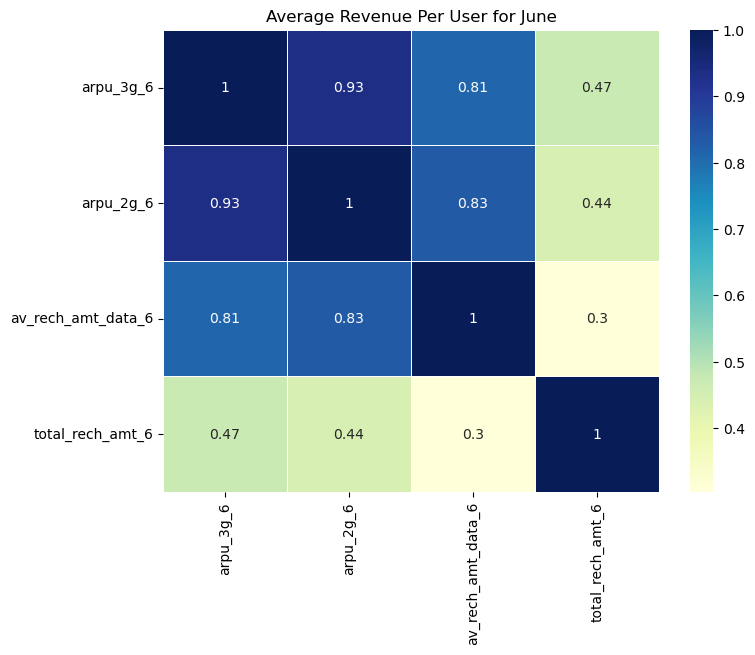

In [53]:
create_heat_map(telecom_data[['arpu_3g_6','arpu_2g_6','av_rech_amt_data_6','total_rech_amt_6']].corr(), 'Average Revenue Per User for June')

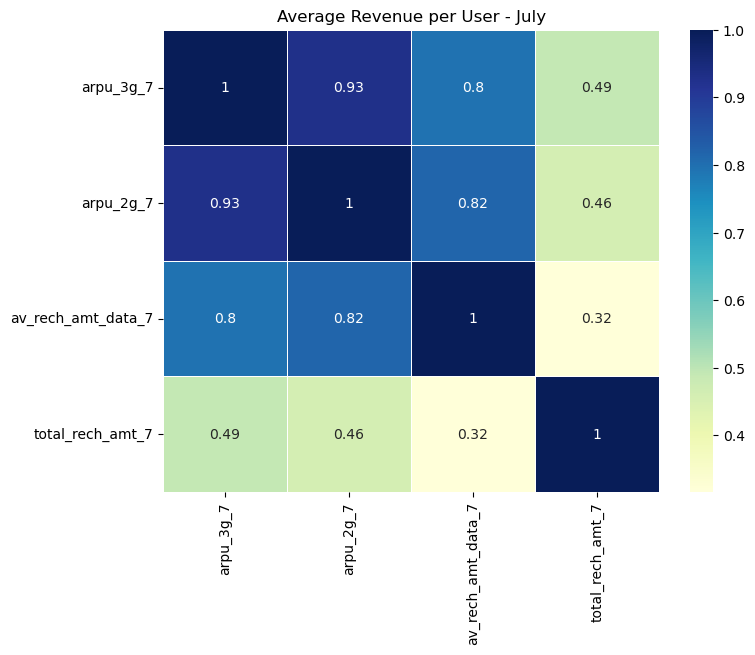

In [54]:
create_heat_map(telecom_data[['arpu_3g_7','arpu_2g_7','av_rech_amt_data_7','total_rech_amt_7']].corr(), 'Average Revenue per User - July')

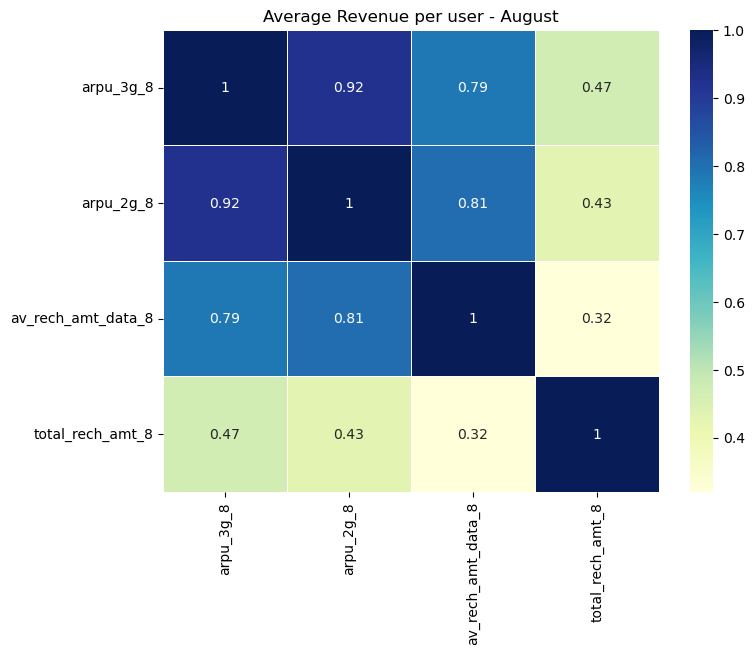

In [55]:
create_heat_map(telecom_data[['arpu_3g_8','arpu_2g_8','av_rech_amt_data_8','total_rech_amt_8']].corr(),'Average Revenue per user - August')

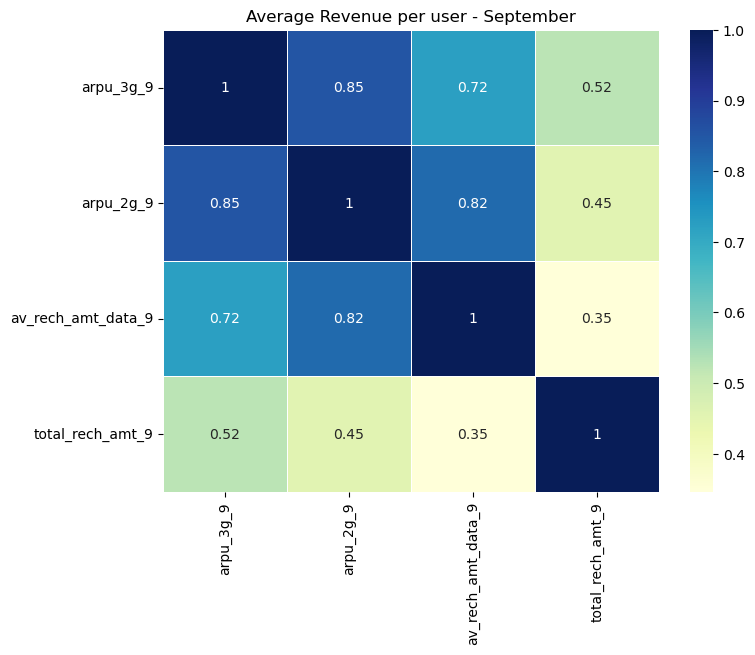

In [56]:
create_heat_map(telecom_data[['arpu_3g_9','arpu_2g_9','av_rech_amt_data_9','total_rech_amt_9']].corr(), 'Average Revenue per user - September')

##### Observations: From the above results we can see arpu_3g_* and arpu_2g_* are highly correlated with av_rech_amt_data_*. So we can drop those columns

In [57]:
col_drop=['arpu_2g_6','arpu_2g_7','arpu_2g_8','arpu_2g_9','arpu_3g_6','arpu_3g_7','arpu_3g_8','arpu_3g_9']
col_drop

['arpu_2g_6',
 'arpu_2g_7',
 'arpu_2g_8',
 'arpu_2g_9',
 'arpu_3g_6',
 'arpu_3g_7',
 'arpu_3g_8',
 'arpu_3g_9']

In [58]:
telecom_data.shape

(99999, 186)

In [59]:
telecom_data.drop(col_drop,axis=1,inplace=True)

In [60]:
telecom_data.shape

(99999, 178)

In [61]:
(telecom_data.isnull().mean()*100).sort_values(ascending=False)

std_og_t2t_mou_9      7.745077
roam_ic_mou_9         7.745077
loc_ic_mou_9          7.745077
loc_og_t2c_mou_9      7.745077
std_og_t2m_mou_9      7.745077
loc_og_t2f_mou_9      7.745077
std_og_t2f_mou_9      7.745077
std_og_mou_9          7.745077
loc_og_t2m_mou_9      7.745077
std_ic_t2f_mou_9      7.745077
spl_ic_mou_9          7.745077
loc_og_t2t_mou_9      7.745077
isd_og_mou_9          7.745077
std_ic_mou_9          7.745077
spl_og_mou_9          7.745077
og_others_9           7.745077
roam_og_mou_9         7.745077
std_ic_t2m_mou_9      7.745077
isd_ic_mou_9          7.745077
ic_others_9           7.745077
loc_ic_t2f_mou_9      7.745077
loc_ic_t2m_mou_9      7.745077
onnet_mou_9           7.745077
std_ic_t2t_mou_9      7.745077
loc_og_mou_9          7.745077
loc_ic_t2t_mou_9      7.745077
offnet_mou_9          7.745077
isd_og_mou_8          5.378054
std_ic_t2f_mou_8      5.378054
og_others_8           5.378054
std_og_mou_8          5.378054
spl_og_mou_8          5.378054
std_ic_t

In [62]:
null_columns = telecom_data.columns[telecom_data.isnull().any()]
list(null_columns)

['onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2f_mou_9',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'std_og_mou_9',


##### Impute missing values using XGBoost for each column with missing values


In [63]:
for column in null_columns:
    # Step 1: Create training and testing datasets
    train_data = telecom_data[telecom_data[column].notnull()]
    test_data = telecom_data[telecom_data[column].isnull()]

    # Step 2: Prepare features and target variable
    X_train = train_data.drop(columns=[column])  # Exclude the column being imputed
    y_train = train_data[column]

    # If there's no data to train on, continue to the next column
    if X_train.empty:
        continue

    # Prepare test features
    X_test = test_data.drop(columns=[column])  # Same as for training

    # Step 3: Train the XGBoost model
    model = xgb.XGBRegressor()
    model.fit(X_train, y_train)

    # Step 4: Predict the missing values
    predicted_values = model.predict(X_test)

    # Step 5: Impute the missing values in the original DataFrame
    telecom_data.loc[telecom_data[column].isnull(), column] = predicted_values

In [64]:
(telecom_data.isnull().mean()*100).sort_values(ascending=False)

mobile_number         0.0
last_day_rch_amt_6    0.0
isd_ic_mou_6          0.0
isd_ic_mou_7          0.0
isd_ic_mou_8          0.0
isd_ic_mou_9          0.0
ic_others_6           0.0
ic_others_7           0.0
ic_others_8           0.0
ic_others_9           0.0
total_rech_num_6      0.0
total_rech_num_7      0.0
total_rech_num_8      0.0
total_rech_num_9      0.0
total_rech_amt_6      0.0
total_rech_amt_7      0.0
total_rech_amt_8      0.0
total_rech_amt_9      0.0
max_rech_amt_6        0.0
max_rech_amt_7        0.0
max_rech_amt_8        0.0
spl_ic_mou_9          0.0
spl_ic_mou_8          0.0
spl_ic_mou_7          0.0
std_ic_t2f_mou_8      0.0
std_ic_t2t_mou_8      0.0
std_ic_t2t_mou_9      0.0
std_ic_t2m_mou_6      0.0
std_ic_t2m_mou_7      0.0
std_ic_t2m_mou_8      0.0
std_ic_t2m_mou_9      0.0
std_ic_t2f_mou_6      0.0
std_ic_t2f_mou_7      0.0
std_ic_t2f_mou_9      0.0
spl_ic_mou_6          0.0
std_ic_mou_6          0.0
std_ic_mou_7          0.0
std_ic_mou_8          0.0
std_ic_mou_9

In [65]:
telecom_data.shape

(99999, 178)

In [66]:
telecom_data.head(10)

mobile_number    arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  \
0     7000842753   197.385   214.816   213.803   21.100  2454.313965   
1     7001865778    34.047   355.074   268.321   86.285    24.110000   
2     7001625959   167.690   189.058   210.226  290.714    11.540000   
3     7001204172   221.338   251.102   508.054  389.500    99.910000   
4     7000142493   261.636   309.876   238.174  163.426    50.310000   
5     7000286308    50.258    58.810    83.386  170.826    50.160000   
6     7001051193   429.023   190.704   255.114  114.751    71.030000   
7     7000701601  1069.180  1349.850  3171.480  500.000    57.840000   
8     7001524846   378.721   492.223   137.362  166.787   413.690000   
9     7001864400   119.518   247.435   170.231  160.042    33.890000   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0  2749.799072         0.00  3304.178955    2786.55957   2359.362061   
1    78.680000         7.68    18.340000      15.74000     99.840000   
2    55.240000        37.26    74.810000     143.33000    220.590000   
3    54.390000       310.98   241.710000     123.31000    109.010000   
4   149.440000        83.89    58.780000      76.96000     91.880000   
5    43.630000        85.48   138.790000      19.28000     13.440000   
6    45.030000        76.66    15.230000     262.73000     49.240000   
7    54.680000        52.29  2896.445801     453.43000    567.160000   
8   351.030000        35.08    33.460000      94.66000     80.630000   
9    30.110000        22.43    27.840000      63.48000     54.160000   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00   2825.996826    1298.213989     197.214539           0.00   
1        304.76     53.760000       0.000000       0.000000           0.00   
2        208.36    118.910000       0.000000       0.000000           0.00   
3         71.68    113.540000       0.000000      54.860000          44.38   
4        124.26     45.810000       0.000000       0.000000           0.00   
5         14.46     46.910000       0.000000       0.000000           0.00   
6         92.08     50.330000       0.000000       0.000000           0.00   
7        325.91   2743.669922      16.230000      33.490000          31.64   
8        136.48    108.710000       0.000000       0.000000           0.00   
9         78.34    123.480000       0.000000       0.000000           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0     820.622925    1268.732056     742.330322           0.00     820.555908   
1       0.000000       0.000000       0.000000           0.00       0.000000   
2      38.490000       0.000000       0.000000           0.00      70.940000   
3       0.000000       0.000000      28.090000          39.04       0.000000   
4       0.000000       0.000000       0.000000           0.00       0.000000   
5       0.000000       0.000000       0.000000           0.00       0.000000   
6       0.000000       0.000000       0.000000           0.00       0.000000   
7     843.031189      23.740000      12.590000          38.06     882.500183   
8       0.000000       0.000000       0.000000           0.00       0.000000   
9       0.000000       0.000000       0.000000           0.00       0.000000   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0        774.773926        1547.21814              0.00       5299.081543   
1         23.880000          74.56000              7.68         18.340000   
2          7.190000          28.74000             13.58         14.390000   
3         73.680000          34.81000             10.61         15.490000   
4         50.310000         149.44000             83.89         58.780000   
5         50.160000          43.63000             85.48        138.790000   
6         71.030000          45.03000             76.14         15.230000   
7         51.390000          31.38000             40.28      

#### Filtering the high Value Customers from Good Phase

##### High Value customers are found by the amount more than or equal to the 70th percentile of the average value of total_rech_amt_6 and total_rech_amt_7 in good phase 

In [67]:
telecom_data['good_phase_avg_rech_amt']=(telecom_data['total_rech_amt_6']+telecom_data['total_rech_amt_7'])/2

In [68]:
telecom_data['good_phase_avg_rech_amt'].head()

0    307.0
1    229.0
2    241.5
3    270.0
4    273.0
Name: good_phase_avg_rech_amt, dtype: float64

##### Filtering the customers who fall in or above the 70th percentile

In [69]:
threshhold=telecom_data['good_phase_avg_rech_amt'].quantile(0.70)

In [70]:
telecom_data.shape

(99999, 179)

In [71]:
telecom_data_hv=telecom_data[telecom_data['good_phase_avg_rech_amt']>=threshhold]

In [72]:
telecom_data_hv.shape

(30011, 179)

In [73]:
telecom_data_hv['good_phase_avg_rech_amt'].head()

7     1185.0
8      519.0
13     380.0
16     459.0
17     408.0
Name: good_phase_avg_rech_amt, dtype: float64

##### We can drop the columns related to recharge as we have derived a new variable and it will lead to multicollinearity

In [74]:
telecom_data_hv.drop(['total_rech_amt_6','total_rech_amt_7'], axis=1, inplace=True)

##### Target Variable:Churn

##### For tagging churn we are asked to use the values from the columns total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9

In [75]:
churn_col=['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']

In [76]:
telecom_data_hv[churn_col].head()

total_ic_mou_9  total_og_mou_9  vol_2g_mb_9  vol_3g_mb_9
7             0.00            0.00          0.0          0.0
8            34.91          142.18          0.0          0.0
13          631.86          446.09          0.0          0.0
16          334.56          255.74          0.0          0.0
17           87.13          631.08          0.0          0.0

In [77]:
telecom_data_hv['churn'] = np.where(telecom_data_hv[churn_col].sum(axis=1) == 0, 1, 0)

In [78]:
telecom_data_hv[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9','churn']].head(10)

total_ic_mou_9  total_og_mou_9  vol_2g_mb_9  vol_3g_mb_9  churn
7             0.00            0.00         0.00         0.00      1
8            34.91          142.18         0.00         0.00      0
13          631.86          446.09         0.00         0.00      0
16          334.56          255.74         0.00         0.00      0
17           87.13          631.08         0.00         0.00      0
21          252.61         1031.53         0.00         0.00      0
24          330.03          627.78         0.00         0.00      0
33          114.16            1.70        30.92      5588.11      0
38          114.09          708.04         0.00         0.00      0
41          165.84           89.13         0.00         0.00      0

##### Dropping all the attributes corresponding to the churn phase

In [79]:
churn_phase_col=[col for col in telecom_data.columns if '_9' in col]
churn_phase_col

['arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'last_day_rch_amt_9',
 'total_rech_data_9',
 'max_rech_data_9',
 'av_rech_amt_data_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 'sachet_3g_9']

In [80]:
telecom_data_hv.shape

(30011, 178)

In [81]:
telecom_data_hv.drop(churn_phase_col,axis=1,inplace=True)

In [82]:
telecom_data_hv.shape


(30011, 135)

##### Class Imbalance

In [83]:
churn_percentages=(telecom_data_hv['churn'].value_counts()/len(telecom_data))*100
churn_percentages

churn
0    27.418274
1     2.593026
Name: count, dtype: float64

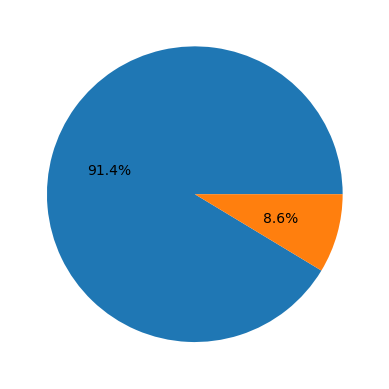

In [84]:
plt.pie(churn_percentages,autopct='%1.1f%%')
plt.show()

###### Observation:As we can see 91.4% of the customers donot churn, there is a class imbalance

##### Handling Outliers

##### Derive New Features

In [85]:
telecom_data_hv.head(20)

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
7      7000701601  1069.180  1349.850  3171.480    57.840000        54.68   
8      7001524846   378.721   492.223   137.362   413.690000       351.03   
13     7002191713   492.846   205.671   593.260   501.760000       108.39   
16     7000875565   430.975   299.869   187.894    50.510000        74.01   
17     7000187447   690.008    18.980    25.499  1185.910000         9.28   
21     7002124215   514.453   597.753   637.760   102.410000       132.11   
24     7001125315   422.050   359.730   354.793   124.190000        55.19   
33     7000149764   977.020  2362.833   409.230     0.000000         0.00   
38     7000815202   363.987   486.558   393.909   248.990000       619.96   
41     7000721289   482.832   425.764   229.769    86.390000       118.88   
48     7000294396  1873.271   575.927   179.218  2061.690000       881.43   
53     7002188521   978.077  1141.296   706.020   135.140000       119.59   
56     7002180748   452.624   320.548   368.807    34.460000        43.11   
57     7001682585  1201.298   687.704   602.052    61.230000         7.39   
60     7000955945   410.261   430.205   289.228    62.240000        85.68   
61     7000152517   565.516   390.307   430.911   178.410000       226.81   
69     7002393996   809.518   794.775    33.060   181.630000       257.06   
73     7002402996  2401.829  1873.764   722.368  2020.840000      3220.46   
74     7001532600   324.449   382.389   350.360   381.230000       635.28   
77     7001328263    30.000    82.378   674.950  2505.398682        34.23   

    onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
7         52.29    453.430000        567.16        325.91      16.230000   
8         35.08     94.660000         80.63        136.48       0.000000   
13       534.24    413.310000        119.28        482.46      23.530000   
16        70.61    296.290000        229.74        162.76       0.000000   
17         7.79     61.640000          0.00          5.54       0.000000   
21        85.14    757.930000        896.68        983.39       0.000000   
24       141.11    450.330000        370.48        283.36       9.300000   
33         0.00      0.000000          0.00          0.00       0.000000   
38       666.38     88.860000         50.58         97.81       0.000000   
41        80.44    232.360000        280.78        136.69       0.000000   
48       156.91   1087.760000        258.29         68.18       0.000000   
53       102.69    479.310000        543.18        261.34       0.000000   
56        50.61    131.590000         90.61         84.31       0.000000   
57        62.89    165.410000        211.31        168.01       0.000000   
60        27.54    200.010000        190.03        135.98       0.000000   
61       170.11    186.680000         45.08        145.08       0.000000   
69         0.00   1608.760000       1585.24          0.00       0.000000   
73      1074.98   3897.060000       1247.11        304.48       0.000000   
74       551.61    110.360000         63.38         85.98       5.040000   
77       149.69   2956.500244         39.44        179.18     785.818115   

    roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
7           33.49          31.64      23.740000          12.59          38.06   
8            0.00           0.00       0.000000           0.00           0.00   
13         144.24          72.11       7.980000          35.26           1.44   
16           2.83           0.00       0.000000          17.74           0.00   
17           4.76           4.81       0.000000           8.46          13.34   
21           0.00           0.00       0.000000           0.00           0.00   
24           0.00          13.83       9.890000           0.00          22.93   
33           0.00           0.00       0.000000           0.00           0.00   
38           0.00           0.00       0.000000           0.

For deriving additional features, we need to determine the various benefits or packages availed by the user in the following 3 phases:
1. Good Phase (In June and July)
2. Action Phase (In August)
3. Churn Phase (In September), here a churn will be determined by zero usage.

Let's create these new features based on the above information

##### Deriving meaningul features for analysis
##### aon(age on network) is the column that is in days ,lets convert those to months which will be easier for analysis

In [86]:
aon_col=[col for col in telecom_data_hv.columns if 'aon' in col]
aon_col

['aon']

In [87]:
telecom_data_hv['aon'].head()

7      802
8      315
13    2607
16     511
17     667
Name: aon, dtype: int64

In [88]:
telecom_data_hv['aon_months']=(telecom_data_hv['aon']/30).round(0)
telecom_data_hv['aon_months'].head()

7     27.0
8     10.0
13    87.0
16    17.0
17    22.0
Name: aon_months, dtype: float64

##### we can bin those values, so that it will be easy for analysis

In [89]:
aon_range = [0, 6, 12, 24, 60, 61]
aon_label = [ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']
telecom_data_hv['aon_range'] = pd.cut(telecom_data_hv['aon_months'], aon_range, labels=aon_label)
telecom_data_hv['aon_range'].head()

7         2-5 Yrs
8     6-12 Months
13            NaN
16        1-2 Yrs
17        1-2 Yrs
Name: aon_range, dtype: category
Categories (5, object): ['0-6 Months' < '6-12 Months' < '1-2 Yrs' < '2-5 Yrs' < '5 Yrs and above']

##### dropping the aon_months variable, as it might lead to multicollinearity

In [90]:
telecom_data_hv.shape

(30011, 137)

In [91]:
telecom_data_hv.drop('aon_months',axis=1,inplace=True)

In [92]:
telecom_data_hv.shape

(30011, 136)

In [93]:
def create_new_columns_and_drop_old(df):
    cols_to_drop = []
    
    for col in df.columns:
        # Look for columns ending with '_6'
        if '_6' in col:
            # Find the corresponding '_7' column
            col_7 = col.replace('_6', '_7')
            if col_7 in df.columns:
                # Check if the column name contains 'max'
                if 'max' in col:
                    # Create a new column with the maximum of _6 and _7
                    new_col_name = f'good_phase_{col.replace("_6", "")}_max'
                    df[new_col_name] = df[[col, col_7]].max(axis=1)
                else:
                    # Create a new column with the average of _6 and _7
                    new_col_name = f'good_phase_{col.replace("_6", "")}_avg'
                    df[new_col_name] = (df[col] + df[col_7]) / 2
                
                # Add _6 and _7 columns to the list for dropping later
                cols_to_drop.extend([col, col_7])
    
    # Drop the original _6 and _7 columns
    df.drop(columns=cols_to_drop, inplace=True)
    
    return df

In [94]:
telecom_data_hv = create_new_columns_and_drop_old(telecom_data_hv)
telecom_data_hv.head(20)

mobile_number    arpu_8  onnet_mou_8  offnet_mou_8  roam_ic_mou_8  \
7      7000701601  3171.480        52.29        325.91          31.64   
8      7001524846   137.362        35.08        136.48           0.00   
13     7002191713   593.260       534.24        482.46          72.11   
16     7000875565   187.894        70.61        162.76           0.00   
17     7000187447    25.499         7.79          5.54           4.81   
21     7002124215   637.760        85.14        983.39           0.00   
24     7001125315   354.793       141.11        283.36          13.83   
33     7000149764   409.230         0.00          0.00           0.00   
38     7000815202   393.909       666.38         97.81           0.00   
41     7000721289   229.769        80.44        136.69           0.00   
48     7000294396   179.218       156.91         68.18           0.00   
53     7002188521   706.020       102.69        261.34           0.00   
56     7002180748   368.807        50.61         84.31           0.00   
57     7001682585   602.052        62.89        168.01           0.00   
60     7000955945   289.228        27.54        135.98           0.00   
61     7000152517   430.911       170.11        145.08           0.00   
69     7002393996    33.060         0.00          0.00           0.00   
73     7002402996   722.368      1074.98        304.48           0.00   
74     7001532600   350.360       551.61         85.98           1.58   
77     7001328263   674.950       149.69        179.18           0.00   

    roam_og_mou_8  loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_t2f_mou_8  \
7           38.06             40.28            162.28             53.23   
8            0.00             12.49             50.54              0.00   
13           1.44             36.01            294.46             23.51   
16           0.00             67.38            128.28             10.26   
17          13.34              0.00              0.00              0.00   
21           0.00             23.34            104.81              1.58   
24          22.93              2.48             72.03             20.83   
33           0.00              0.00              0.00              0.00   
38           0.00              9.48             18.96              0.00   
41           0.00             80.44            107.88             14.88   
48           0.00             29.31             65.58              0.80   
53           0.00            102.69            138.91              0.00   
56           0.00             50.61             73.61              4.28   
57           0.00              5.01            135.11              7.28   
60           0.00             27.54            134.63              1.35   
61           0.00            170.11            137.38              0.49   
69           0.00              0.00              0.00              0.00   
73           0.00             37.56            112.09              0.78   
74          16.78             16.89             26.61              0.00   
77           0.00            149.69            101.63             29.86   

    loc_og_t2c_mou_8  loc_og_mou_8  std_og_t2t_mou_8  std_og_t2m_mou_8  \
7               0.00        255.79             12.01             49.14   
8               7.15         63.04             22.58             75.69   
13              0.49        353.99            498.23            156.94   
16              0.00        205.93              3.23             18.29   
17              0.00          0.00              0.00              0.00   
21              0.00        129.74             61.79            876.99   
24              3.15         95.34            126.61            168.84   
33              0.56          0.00              0.00              0.00   
38              0.00         28.44            656.89             78.84   
41              0.00        203.21              0.00              0.00   
48              0.00         95.69            127.59              1.79   
53    

In [95]:
telecom_data_hv.shape

(30011, 94)

##### Deriving the next features arpu_(average revenue per user) for good phase to check  whether the average revenue per customer has decreased in the action phase than the good phase.


In [96]:
arpu_col=[col for col in telecom_data_hv.columns if 'arpu' in col]
arpu_col

['arpu_8', 'good_phase_arpu_avg']

In [97]:
telecom_data_hv['good_phase_arpu_avg'].round(3)

7         1209.515
8          435.472
13         349.258
16         365.422
17         354.494
21         556.103
24         390.890
33        1669.926
38         425.273
41         454.298
48        1224.599
53        1059.686
56         386.586
57         944.501
60         420.233
61         477.912
69         802.147
73        2137.796
74         353.419
77          56.189
87         668.226
92         498.195
96         731.780
97         334.443
101        457.262
102        387.845
103        982.714
105        529.231
111        371.187
115        868.379
122        362.782
124        418.854
131        403.810
133        866.743
134        618.109
143        367.795
146        349.441
147        313.172
149        701.840
154       1638.100
157        606.633
158        723.138
165        331.639
170        501.960
171        357.092
173        954.031
175        388.674
176        543.096
177        440.340
184        962.340
185        410.129
188        459.154
191        4

In [98]:
telecom_data_hv['good_phase_arpu_avg'].head()

7     1209.5150
8      435.4720
13     349.2585
16     365.4220
17     354.4940
Name: good_phase_arpu_avg, dtype: float64

In [99]:
telecom_data_hv['difference_arpu'] = telecom_data_hv['arpu_8'] - telecom_data_hv['good_phase_arpu_avg']

In [100]:
telecom_data_hv['decrease_arpu_action'] = np.where(telecom_data_hv['difference_arpu'] < 0, 1, 0)

In [101]:
telecom_data_hv[['arpu_8','good_phase_arpu_avg','difference_arpu','decrease_arpu_action']].head()

arpu_8  good_phase_arpu_avg  difference_arpu  decrease_arpu_action
7   3171.480            1209.5150        1961.9650                     0
8    137.362             435.4720        -298.1100                     1
13   593.260             349.2585         244.0015                     0
16   187.894             365.4220        -177.5280                     1
17    25.499             354.4940        -328.9950                     1

##### Deriving the next feature mou_(minutes of usage) for good phase to check  whether the total minutes of usage has decreased in the action phase than the good phase.

In [102]:
mou_col=[col for col in telecom_data_hv.columns if 'total_' in col]
mou_col

['total_og_mou_8',
 'total_ic_mou_8',
 'total_rech_num_8',
 'total_rech_amt_8',
 'total_rech_data_8',
 'good_phase_total_og_mou_avg',
 'good_phase_total_ic_mou_avg',
 'good_phase_total_rech_num_avg',
 'good_phase_total_rech_data_avg']

In [103]:
telecom_data_hv[['good_phase_total_og_mou_avg','good_phase_total_ic_mou_avg']].head()

good_phase_total_og_mou_avg  good_phase_total_ic_mou_avg
7                       548.385                      592.250
8                       470.010                       66.175
13                      549.750                      570.595
16                      316.410                      373.210
17                      625.170                       47.095

In [104]:
telecom_data_hv['good_phase_total_mou_avg']=telecom_data_hv['good_phase_total_og_mou_avg']+telecom_data_hv['good_phase_total_ic_mou_avg']

In [105]:
telecom_data_hv['total_mou_8']=telecom_data_hv['total_og_mou_8']+telecom_data_hv['total_ic_mou_8']

In [106]:
telecom_data_hv['good_phase_total_mou_avg'].head(10)

7     1140.635
8      536.185
13    1120.345
16     689.620
17     672.265
21    1114.055
24     881.565
33       7.540
38     573.565
41     736.485
Name: good_phase_total_mou_avg, dtype: float64

##### Creating new variable to find out if there is decrease in mou(minutes of usage) between good phase and action phase

In [107]:
telecom_data_hv['difference_mou']=telecom_data_hv['total_mou_8']-telecom_data_hv['good_phase_total_mou_avg']

In [108]:
telecom_data_hv['decrease_mou_action']=np.where((telecom_data_hv['difference_mou'] < 0), 1, 0)

In [109]:
telecom_data_hv['decrease_mou_action'].head()

7     1
8     1
13    0
16    1
17    1
Name: decrease_mou_action, dtype: int64

##### Deriving the next feature  decrease in rech_amt_(count of recharge) for good phase to check  whether the total recharge count has decreased in the action phase than the good phase.

In [110]:
rech_col=[col for col in telecom_data_hv.columns if 'rech_' in col]
rech_col

['total_rech_num_8',
 'total_rech_amt_8',
 'max_rech_amt_8',
 'total_rech_data_8',
 'max_rech_data_8',
 'av_rech_amt_data_8',
 'good_phase_avg_rech_amt',
 'good_phase_total_rech_num_avg',
 'good_phase_max_rech_amt_max',
 'good_phase_total_rech_data_avg',
 'good_phase_max_rech_data_max',
 'good_phase_av_rech_amt_data_avg']

In [111]:
telecom_data_hv['difference_rech_amt'] = telecom_data_hv['total_rech_amt_8'] - telecom_data_hv['good_phase_avg_rech_amt']

In [112]:
telecom_data_hv['decrease_rech_amt_action'] = np.where((telecom_data_hv['difference_rech_amt'] < 0), 1, 0) 

In [113]:
telecom_data_hv['decrease_rech_amt_action'].head()

7     0
8     1
13    0
16    1
17    1
Name: decrease_rech_amt_action, dtype: int64

##### Deriving the next feature  decrease in vbc(volume based charging-the amount of data usage that was charged based on the volume consumed usually in MB or GB) for good phase to check  whether the amount of date used has decreased in the action phase than the good phase.

In [114]:
vbc_col=[col for col in telecom_data_hv.columns if 'vbc' in col]
vbc_col

['aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g']

In [115]:
telecom_data_hv[vbc_col].head()

aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  sep_vbc_3g
7        57.74       19.38       18.74         0.0
8        21.03      910.65      122.16         0.0
13        0.00        0.00        0.00         0.0
16        0.00        2.45       21.89         0.0
17        0.00        0.00        0.00         0.0

In [116]:
telecom_data_hv['vbc_good']=((telecom_data_hv['jun_vbc_3g']+telecom_data_hv['jul_vbc_3g'])/2).round(2)

In [117]:
telecom_data_hv['difference_vbc']=telecom_data_hv['aug_vbc_3g']-telecom_data_hv['vbc_good']

In [118]:
telecom_data_hv['decrease_vbc_action'] = np.where(telecom_data_hv['difference_vbc'] < 0 , 1, 0)

In [119]:
telecom_data_hv.drop(['sep_vbc_3g'],axis=1,inplace=True)
telecom_data_hv.shape

(30011, 104)

### Exploratory Data Analysis

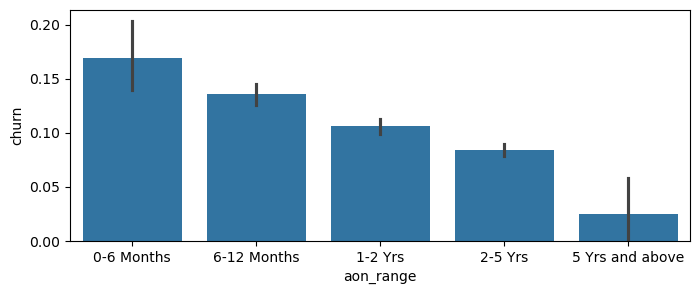

In [120]:
plt.figure(figsize=(8,3))
sns.barplot(x='aon_range',y='churn', data=telecom_data_hv)
plt.show()

##### Observation: We can see customers in 0-6 months tend to churn more and it gradually decreases as the customers tend to retain the network

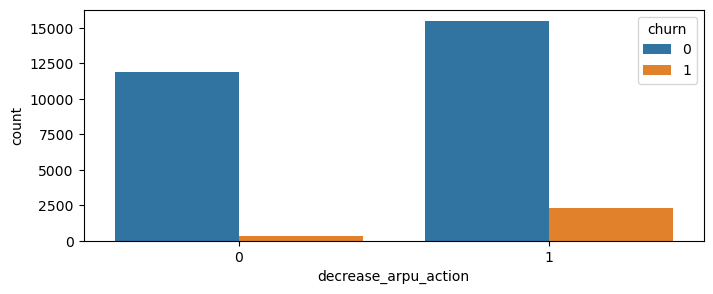

In [121]:
plt.figure(figsize=(8,3))
sns.countplot(x=telecom_data_hv['decrease_arpu_action'], hue=telecom_data_hv['churn'])
plt.show()

##### Observation: We can see that when there is decrease in revenue in action phase, the churn rate is higher

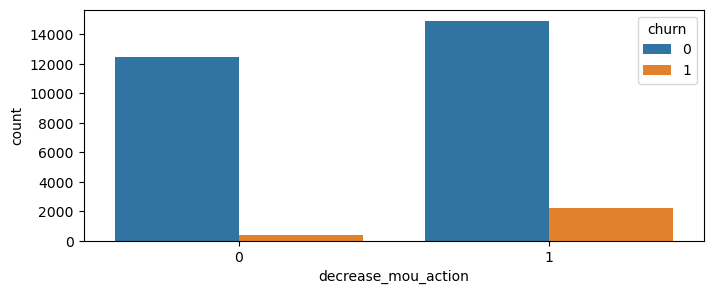

In [122]:
plt.figure(figsize=(8,3))
sns.countplot(x=telecom_data_hv['decrease_mou_action'], hue=telecom_data_hv['churn'])
plt.show()

##### Obseration: We can see that when there is a decrease in minutes of usage in action phase , the churn rate is higher

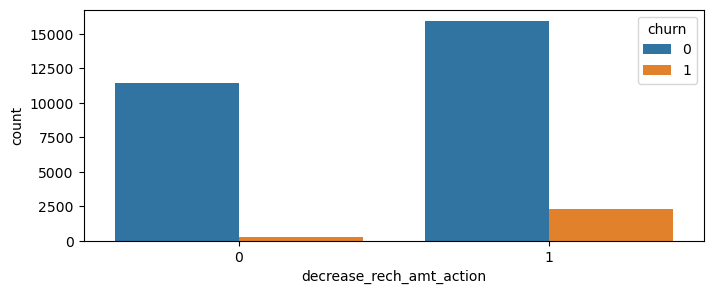

In [123]:
plt.figure(figsize=(8,3))
sns.countplot(x=telecom_data_hv['decrease_rech_amt_action'], hue=telecom_data_hv['churn'])
plt.show()

##### Observation:We can see that when there is decrease in the amount of recharge in action phase , the churn rate is higher


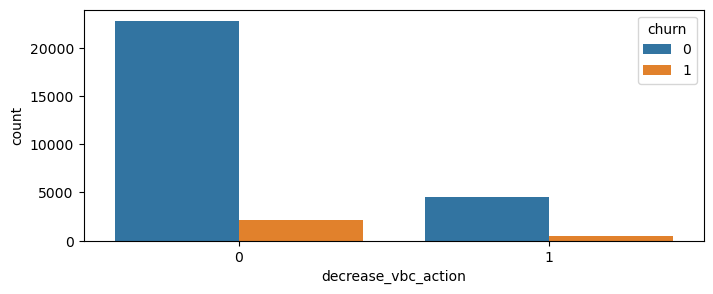

In [124]:
plt.figure(figsize=(8,3))
sns.countplot(x=telecom_data_hv['decrease_vbc_action'], hue=telecom_data_hv['churn'])
plt.show()

##### Observation: We can see that the churn rate is more for customers whose volume based cost in action phase is more. 

In [125]:
telecom_data_hv.dtypes

mobile_number                         int64
arpu_8                              float64
onnet_mou_8                         float64
offnet_mou_8                        float64
roam_ic_mou_8                       float64
roam_og_mou_8                       float64
loc_og_t2t_mou_8                    float64
loc_og_t2m_mou_8                    float64
loc_og_t2f_mou_8                    float64
loc_og_t2c_mou_8                    float64
loc_og_mou_8                        float64
std_og_t2t_mou_8                    float64
std_og_t2m_mou_8                    float64
std_og_t2f_mou_8                    float64
std_og_mou_8                        float64
isd_og_mou_8                        float64
spl_og_mou_8                        float64
og_others_8                         float64
total_og_mou_8                      float64
loc_ic_t2t_mou_8                    float64
loc_ic_t2m_mou_8                    float64
loc_ic_t2f_mou_8                    float64
loc_ic_mou_8                    

In [126]:
telecom_data_hv['churn']=telecom_data_hv['churn'].astype(object)

In [127]:
telecom_data_hv.dtypes

mobile_number                         int64
arpu_8                              float64
onnet_mou_8                         float64
offnet_mou_8                        float64
roam_ic_mou_8                       float64
roam_og_mou_8                       float64
loc_og_t2t_mou_8                    float64
loc_og_t2m_mou_8                    float64
loc_og_t2f_mou_8                    float64
loc_og_t2c_mou_8                    float64
loc_og_mou_8                        float64
std_og_t2t_mou_8                    float64
std_og_t2m_mou_8                    float64
std_og_t2f_mou_8                    float64
std_og_mou_8                        float64
isd_og_mou_8                        float64
spl_og_mou_8                        float64
og_others_8                         float64
total_og_mou_8                      float64
loc_ic_t2t_mou_8                    float64
loc_ic_t2m_mou_8                    float64
loc_ic_t2f_mou_8                    float64
loc_ic_mou_8                    

##### Removing the derived columns which are not needed for further analysis

In [128]:
list(telecom_data_hv.columns)

['mobile_number',
 'arpu_8',
 'onnet_mou_8',
 'offnet_mou_8',
 'roam_ic_mou_8',
 'roam_og_mou_8',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_8',
 'loc_og_mou_8',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_8',
 'std_og_mou_8',
 'isd_og_mou_8',
 'spl_og_mou_8',
 'og_others_8',
 'total_og_mou_8',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_8',
 'loc_ic_t2f_mou_8',
 'loc_ic_mou_8',
 'std_ic_t2t_mou_8',
 'std_ic_t2m_mou_8',
 'std_ic_t2f_mou_8',
 'std_ic_mou_8',
 'total_ic_mou_8',
 'spl_ic_mou_8',
 'isd_ic_mou_8',
 'ic_others_8',
 'total_rech_num_8',
 'total_rech_amt_8',
 'max_rech_amt_8',
 'last_day_rch_amt_8',
 'total_rech_data_8',
 'max_rech_data_8',
 'av_rech_amt_data_8',
 'vol_2g_mb_8',
 'vol_3g_mb_8',
 'monthly_2g_8',
 'sachet_2g_8',
 'monthly_3g_8',
 'sachet_3g_8',
 'aon',
 'aug_vbc_3g',
 'jul_vbc_3g',
 'jun_vbc_3g',
 'good_phase_avg_rech_amt',
 'churn',
 'aon_range',
 'good_phase_arpu_avg',
 'good_phase_onnet_mou_avg',
 'good_phase_offne

In [129]:
col_drop=['aon_range','good_phase_arpu_avg','good_phase_total_mou_avg','difference_mou','difference_rech_amt','vbc_good','difference_vbc','good_phase_avg_rech_amt','difference_arpu']

In [130]:
telecom_data_hv.shape

(30011, 104)

In [131]:
telecom_data_hv.drop(col_drop,axis=1,inplace=True)

In [132]:
telecom_data_hv.shape

(30011, 95)

In [133]:
corr_data=telecom_data_hv.drop(['mobile_number'],axis=1)

In [134]:
num_cols=corr_data.select_dtypes(exclude=['object','category']).columns
num_cols

Index(['arpu_8', 'onnet_mou_8', 'offnet_mou_8', 'roam_ic_mou_8',
       'roam_og_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8', 'loc_og_mou_8',
       'std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'std_og_t2f_mou_8',
       'std_og_mou_8', 'isd_og_mou_8', 'spl_og_mou_8', 'og_others_8',
       'total_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8',
       'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'std_ic_t2t_mou_8',
       'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8', 'std_ic_mou_8',
       'total_ic_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_8', 'ic_others_8',
       'total_rech_num_8', 'total_rech_amt_8', 'max_rech_amt_8',
       'last_day_rch_amt_8', 'total_rech_data_8', 'max_rech_data_8',
       'av_rech_amt_data_8', 'vol_2g_mb_8', 'vol_3g_mb_8', 'monthly_2g_8',
       'sachet_2g_8', 'monthly_3g_8', 'sachet_3g_8', 'aon', 'aug_vbc_3g',
       'jul_vbc_3g', 'jun_vbc_3g', 'good_phase_onnet_mou_avg',
       'good_phase_offnet_mou_avg', 'good_phase_roam_ic_mou_av

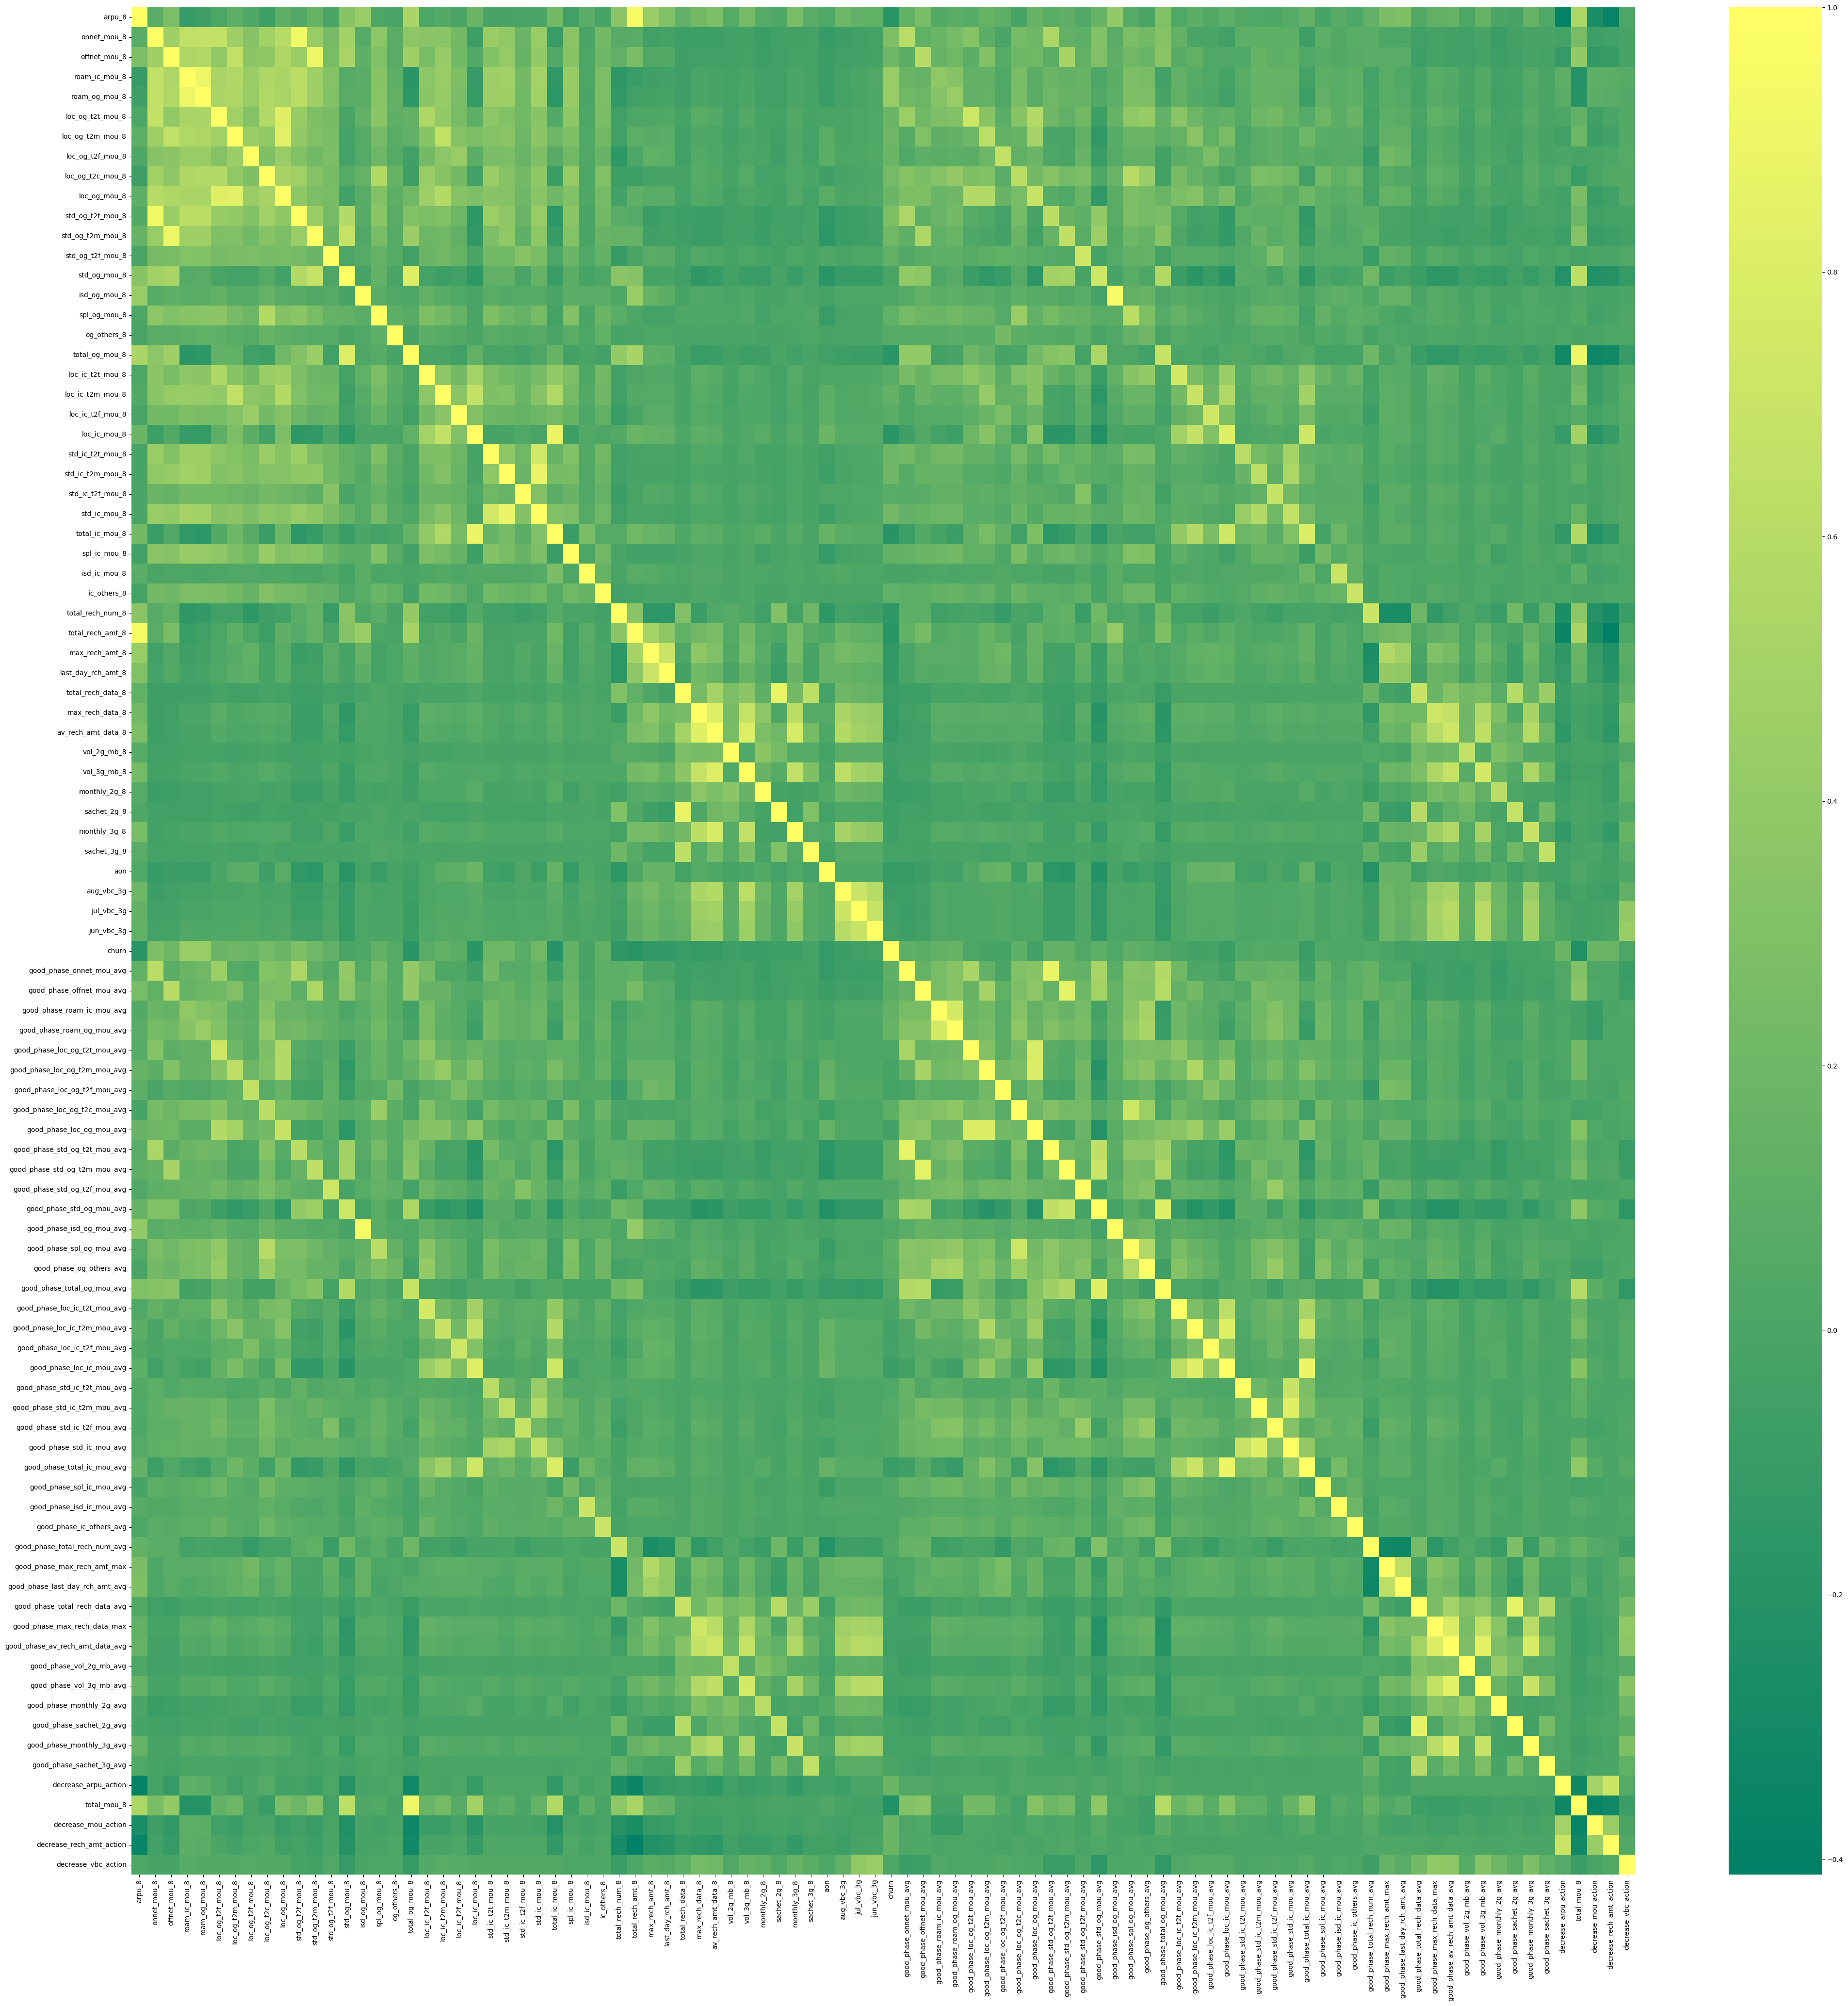

In [135]:
plt.figure(figsize=(50,50))
sns.heatmap(corr_data.corr(),annot=False, 
                                cmap='summer')
plt.show()

In [136]:
# Defining a function for box plot

def bx_plot(*args,data): 
    
    m=math.ceil(len(args)/2)  # getting the length f arguments to determine the shape of subplots                   
    fig,axes = plt.subplots(m,2,squeeze=False, figsize = (16, 8*m))
    ax_li = axes.flatten()       # flattening the numpy array returned by subplots
    i=0
    for col in args:
        sns.boxplot(col, data, ax=ax_li[i])  # plotting the box plot
        ax_li[i].set_title(col)
        plt.tight_layout()
        i=i+1

In [137]:
# Plotting the distribution for recharge amount 

col_rech = [col for col in telecom_data_hv.columns if 'rech' in col]
col_rech

['total_rech_num_8',
 'total_rech_amt_8',
 'max_rech_amt_8',
 'total_rech_data_8',
 'max_rech_data_8',
 'av_rech_amt_data_8',
 'good_phase_total_rech_num_avg',
 'good_phase_max_rech_amt_max',
 'good_phase_total_rech_data_avg',
 'good_phase_max_rech_data_max',
 'good_phase_av_rech_amt_data_avg',
 'decrease_rech_amt_action']

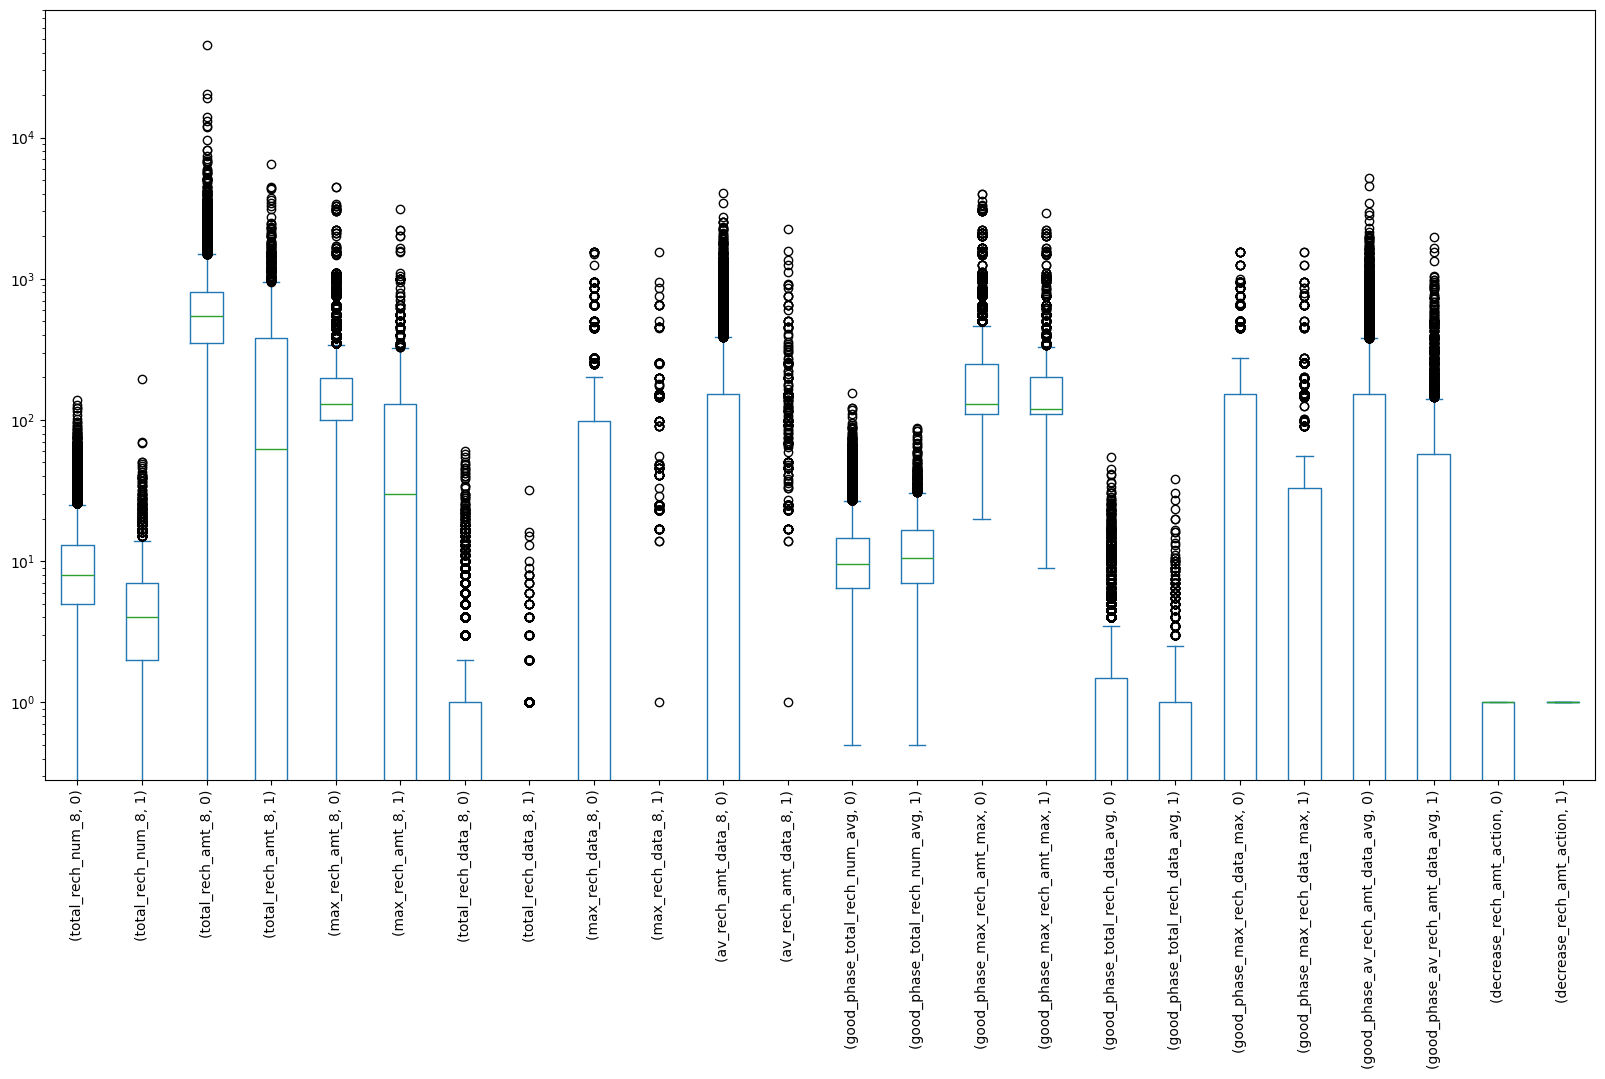

In [138]:
fig,axes = plt.subplots(1,1,squeeze=False, figsize = (20, 10))
ax=axes[0][0]

telecom_data_hv.pivot(columns='churn')[col_rech].plot(kind = 'box',ax=ax)

ax.xaxis.set_tick_params(rotation=90)
plt.yscale('log')

In [139]:
# Checking the data distribution of each recharge variable across multiple percentiles

telecom_data_hv[col_rech].describe(percentiles=[.75,0.9,0.99,0.999,0.9999,.99999]).T

count        mean         std  min    50%  \
total_rech_num_8                 30011.0   10.225317    9.478572  0.0    8.0   
total_rech_amt_8                 30011.0  613.638799  601.821630  0.0  520.0   
max_rech_amt_8                   30011.0  162.869348  172.605809  0.0  130.0   
total_rech_data_8                30011.0    1.035287    2.405187  0.0    0.0   
max_rech_data_8                  30011.0   55.258072  104.787395  0.0    0.0   
av_rech_amt_data_8               30011.0   89.762766  185.812445  0.0    0.0   
good_phase_total_rech_num_avg    30011.0   12.017394    8.729543  0.5    9.5   
good_phase_max_rech_amt_max      30011.0  205.245943  210.657398  9.0  130.0   
good_phase_total_rech_data_avg   30011.0    0.995468    2.130622  0.0    0.0   
good_phase_max_rech_data_max     30011.0   72.850655  119.536341  0.0    0.0   
good_phase_av_rech_amt_data_avg  30011.0   94.136915  177.500322  0.0    0.0   
decrease_rech_amt_action         30011.0    0.609310    0.487913  0.0    1.0   

                                   75%     90%     99%     99.9%      99.99%  \
total_rech_num_8                  13.0    21.0    46.0    75.000    121.9990   
total_rech_amt_8                 790.0  1155.0  2341.9  5020.790  13999.0800   
max_rech_amt_8                   198.0   252.0   951.0  1699.000   3299.0000   
total_rech_data_8                  1.0     3.0    10.0    25.000     49.9990   
max_rech_data_8                   56.0   198.0   455.0   951.000   1555.0000   
av_rech_amt_data_8               145.0   262.0   855.0  1764.000   2520.0000   
good_phase_total_rech_num_avg     15.0    22.5    44.5    73.995    117.9920   
good_phase_max_rech_amt_max      250.0   398.0  1010.0  2100.000   3349.9490   
good_phase_total_rech_data_avg     1.0     2.5    10.0    23.495     40.4980   
good_phase_max_rech_data_max     154.0   252.0   505.0   951.000   1555.0000   
good_phase_av_rech_amt_data_avg  147.0   280.0   756.0  1634.265   2981.8505   
decrease_rech_amt_action           1.0     1.0     1.0     1.000      1.0000   

                                     99.999%      max  
total_rech_num_8                   178.59420    196.0  
total_rech_amt_8                 37843.00850  45320.0  
max_rech_amt_8                    4449.00000   4449.0  
total_rech_data_8                   59.09970     60.0  
max_rech_data_8                   1555.00000   1555.0  
av_rech_amt_data_8                3867.43550   4061.0  
good_phase_total_rech_num_avg      145.59670    155.5  
good_phase_max_rech_amt_max       4010.00000   4010.0  
good_phase_total_rech_data_avg      51.64905     54.5  
good_phase_max_rech_data_max      1555.00000   1555.0  
good_phase_av_rech_amt_data_avg   4951.03620   5142.5  
decrease_rech_amt_action             1.00000      1.0

In [140]:
q=telecom_data_hv['total_rech_amt_8'].quantile(0.9999) 
telecom_data_hv=telecom_data_hv[telecom_data_hv['total_rech_amt_8']<=q]
telecom_data_hv.shape

(30007, 95)

In [141]:
# Checking for highly correlated columns
# function to eliminate redundant pairs
def redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()   # to ensure that duplicate pairs are not present
    cols = df.columns       # getting list of all solumns in dataframe  
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

# function to get highly correlated pairs
def top_correlations(df, n):     
    cor = df.corr().abs().unstack()  # getting the absolute value of all correlation coefficienrs
    labels_to_drop = redundant_pairs(df)
    cor = cor.drop(labels=labels_to_drop).sort_values(ascending=False)
    return cor[0:n]

In [142]:
# Printing the top correlations

print("Top Correlations \n")
print('----------------- \n')
print(top_correlations(telecom_data_hv[col_rech],10))

Top Correlations 

----------------- 

max_rech_data_8               av_rech_amt_data_8                 0.828321
good_phase_max_rech_data_max  good_phase_av_rech_amt_data_avg    0.799659
av_rech_amt_data_8            good_phase_av_rech_amt_data_avg    0.723978
max_rech_data_8               good_phase_max_rech_data_max       0.713576
total_rech_num_8              good_phase_total_rech_num_avg      0.711722
total_rech_data_8             good_phase_total_rech_data_avg     0.694321
max_rech_data_8               good_phase_av_rech_amt_data_avg    0.668055
av_rech_amt_data_8            good_phase_max_rech_data_max       0.604016
max_rech_amt_8                good_phase_max_rech_amt_max        0.565869
total_rech_amt_8              max_rech_amt_8                     0.516391
dtype: float64


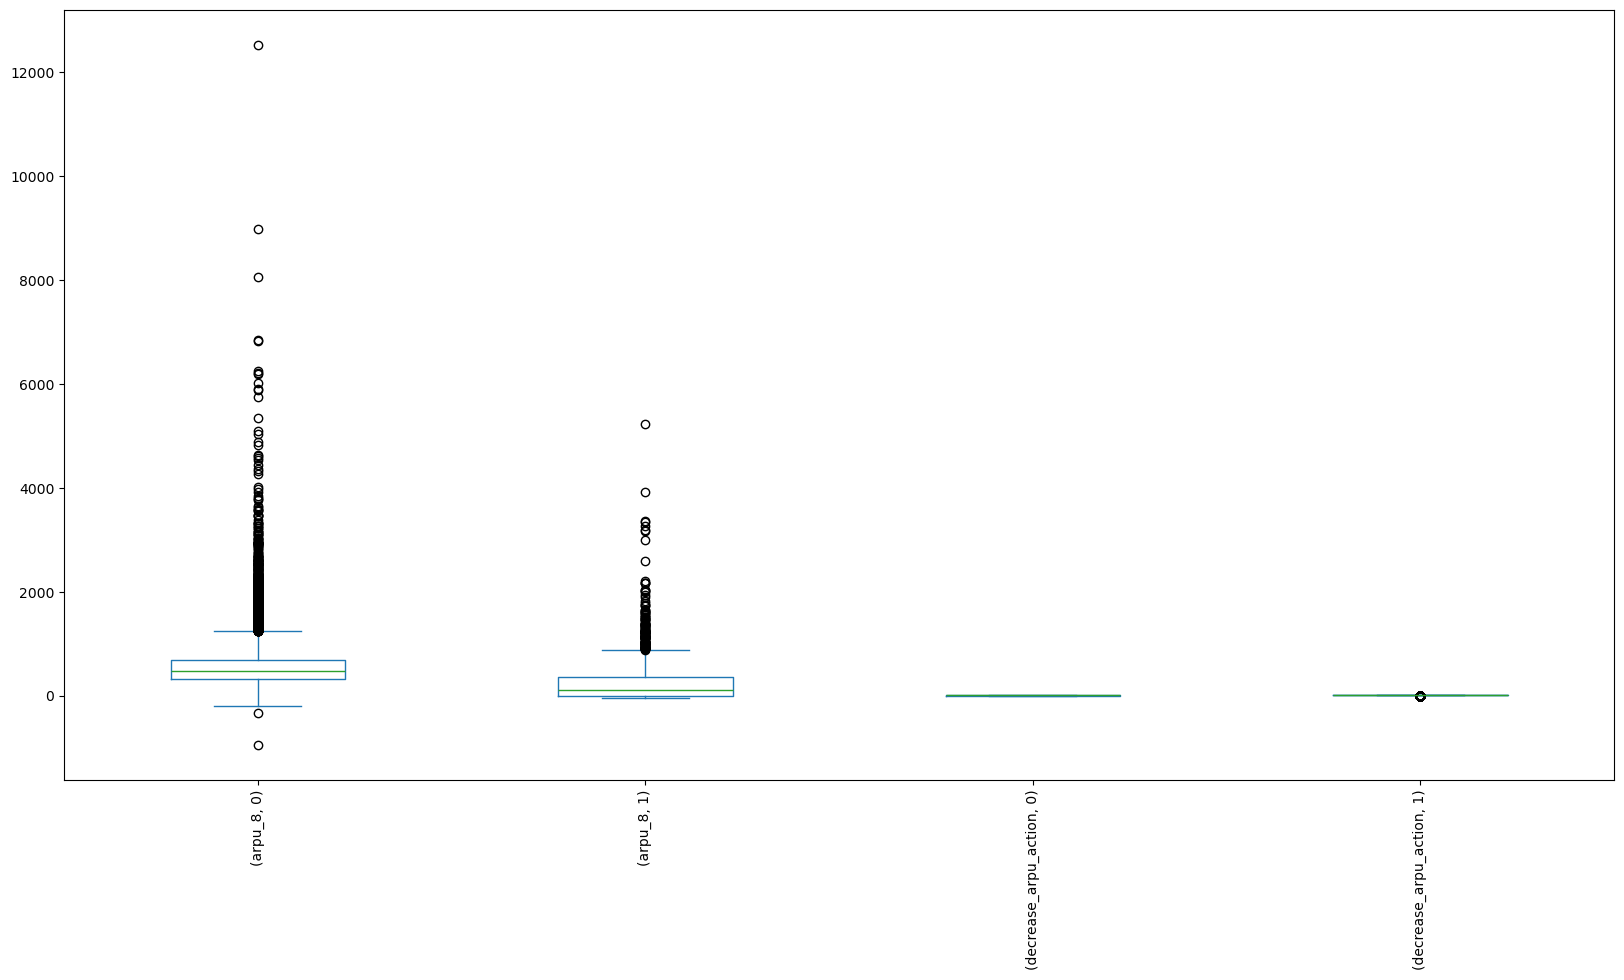

In [143]:
# plotting the distribution for arpu

col_arpu= [col for col in telecom_data_hv.columns if 'arpu' in col]

fig,axes = plt.subplots(1,1,squeeze=False, figsize = (20, 10))
ax=axes[0][0]

telecom_data_hv.pivot(columns='churn')[col_arpu].plot(kind = 'box',ax=ax)

ax.xaxis.set_tick_params(rotation=90)

In [144]:
# Printing the top correlations

print("Top Correlations \n")
print('----------------- \n')
print(top_correlations(telecom_data_hv[col_arpu],4))

Top Correlations 

----------------- 

arpu_8  decrease_arpu_action    0.440344
dtype: float64


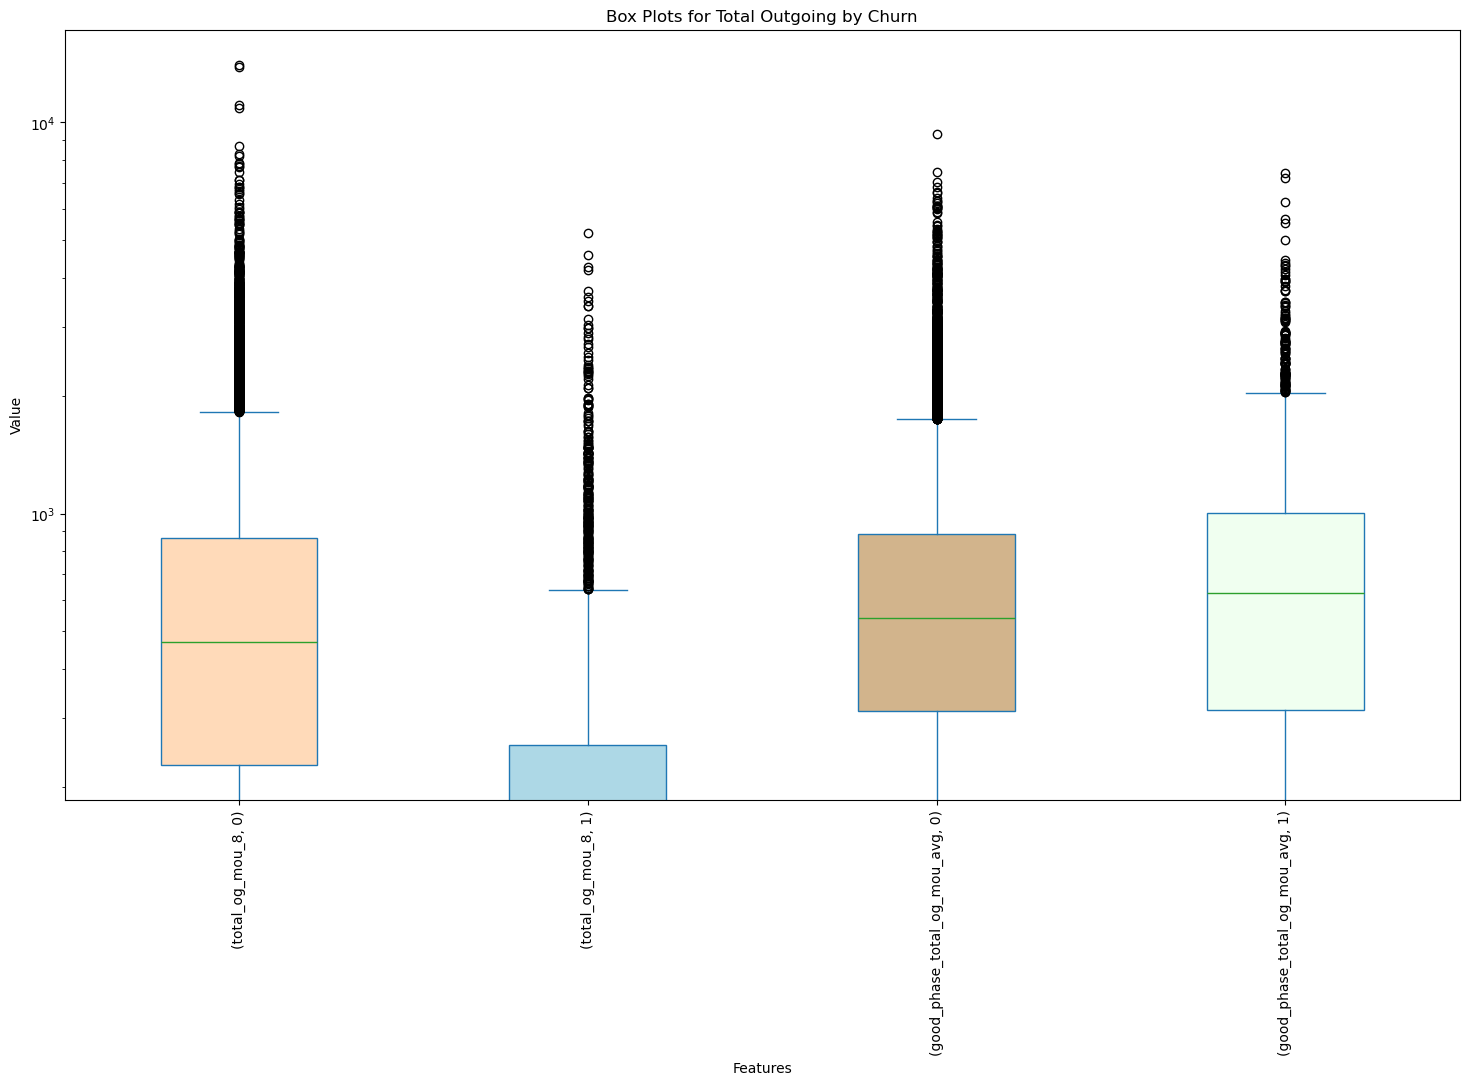

In [145]:
# Plotting the distribution for outgoing calls

col_og = [col for col in telecom_data_hv.columns if 'total_og' in col]
fig,axes = plt.subplots(1,1,squeeze=False, figsize = (18, 10))
ax=axes[0][0]
colors = ['peachpuff', 'lightblue', 'tan', 'honeydew']
bplot = telecom_data_hv.pivot(columns='churn')[col_og].plot(kind = 'box',ax=ax, patch_artist=True)
for patch, color in zip(ax.patches, colors):
    patch.set_facecolor(color)
ax.xaxis.set_tick_params(rotation=90)
plt.yscale('log')
ax.set_title("Box Plots for Total Outgoing by Churn")
ax.set_ylabel("Value")
ax.set_xlabel("Features")
plt.show()

In [146]:
og = [col for col in telecom_data_hv.columns if 'og' in col]



# Printing the top correlations

print("Top Correlations \n")
print('----------------- \n')
print(top_correlations(telecom_data_hv[og],30))

Top Correlations 

----------------- 

isd_og_mou_8                   good_phase_isd_og_mou_avg        0.843356
loc_og_t2m_mou_8               loc_og_mou_8                     0.832336
loc_og_t2t_mou_8               loc_og_mou_8                     0.816566
good_phase_std_og_mou_avg      good_phase_total_og_mou_avg      0.814579
std_og_mou_8                   total_og_mou_8                   0.813446
good_phase_loc_og_t2m_mou_avg  good_phase_loc_og_mou_avg        0.798078
good_phase_loc_og_t2t_mou_avg  good_phase_loc_og_mou_avg        0.787091
good_phase_loc_og_t2c_mou_avg  good_phase_spl_og_mou_avg        0.741726
std_og_mou_8                   good_phase_std_og_mou_avg        0.724920
loc_og_t2t_mou_8               good_phase_loc_og_t2t_mou_avg    0.719581
std_og_t2f_mou_8               good_phase_std_og_t2f_mou_avg    0.717091
good_phase_std_og_t2m_mou_avg  good_phase_std_og_mou_avg        0.697906
loc_og_mou_8                   good_phase_loc_og_mou_avg        0.687997
total_og_mou

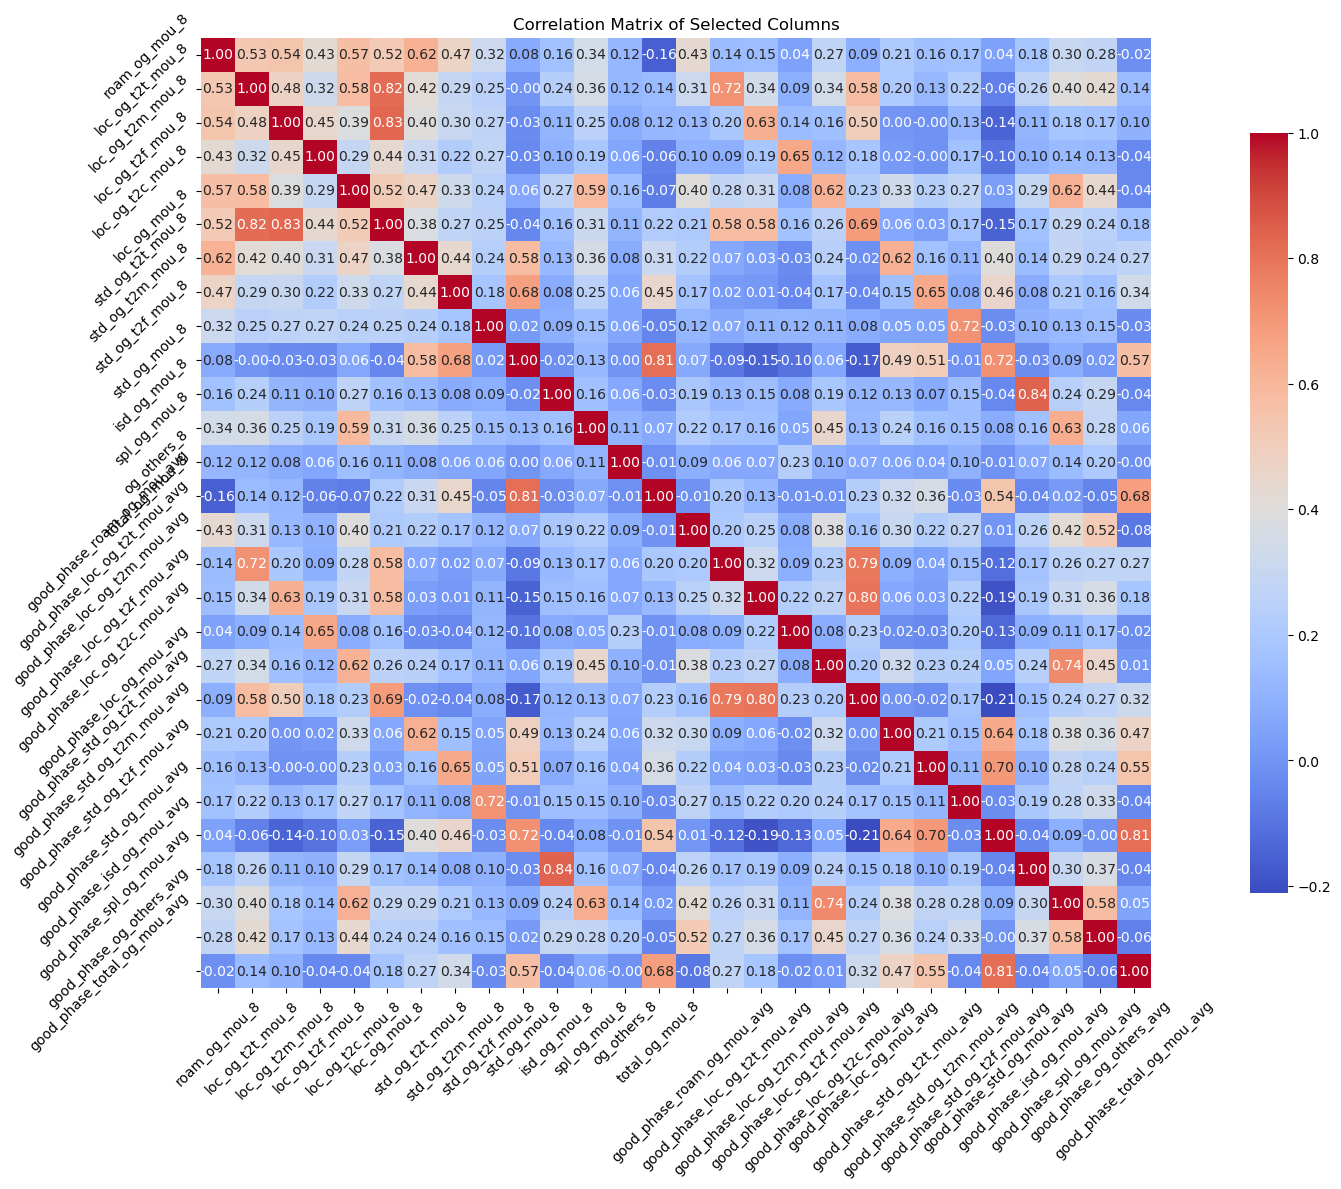

In [147]:
correlation_matrix = telecom_data_hv[og].corr()

plt.figure(figsize=(20, 12))

# Create a heatmap with the correlation matrix
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Selected Columns')
plt.xticks(rotation=45)
plt.yticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

In [148]:
# Dropping columns with more than 75% correlation
telecom_data_hv.drop(['std_og_mou_8','good_phase_std_og_mou_avg','good_phase_loc_og_mou_avg', 'good_phase_loc_og_t2t_mou_avg','good_phase_isd_og_mou_avg','good_phase_loc_og_t2m_mou_avg','loc_og_t2m_mou_8',
         'good_phase_std_og_t2f_mou_avg','good_phase_loc_og_t2f_mou_avg','good_phase_std_og_t2t_mou_avg','good_phase_std_og_mou_avg'],axis=1,inplace=True)
telecom_data_hv.shape

(30007, 85)

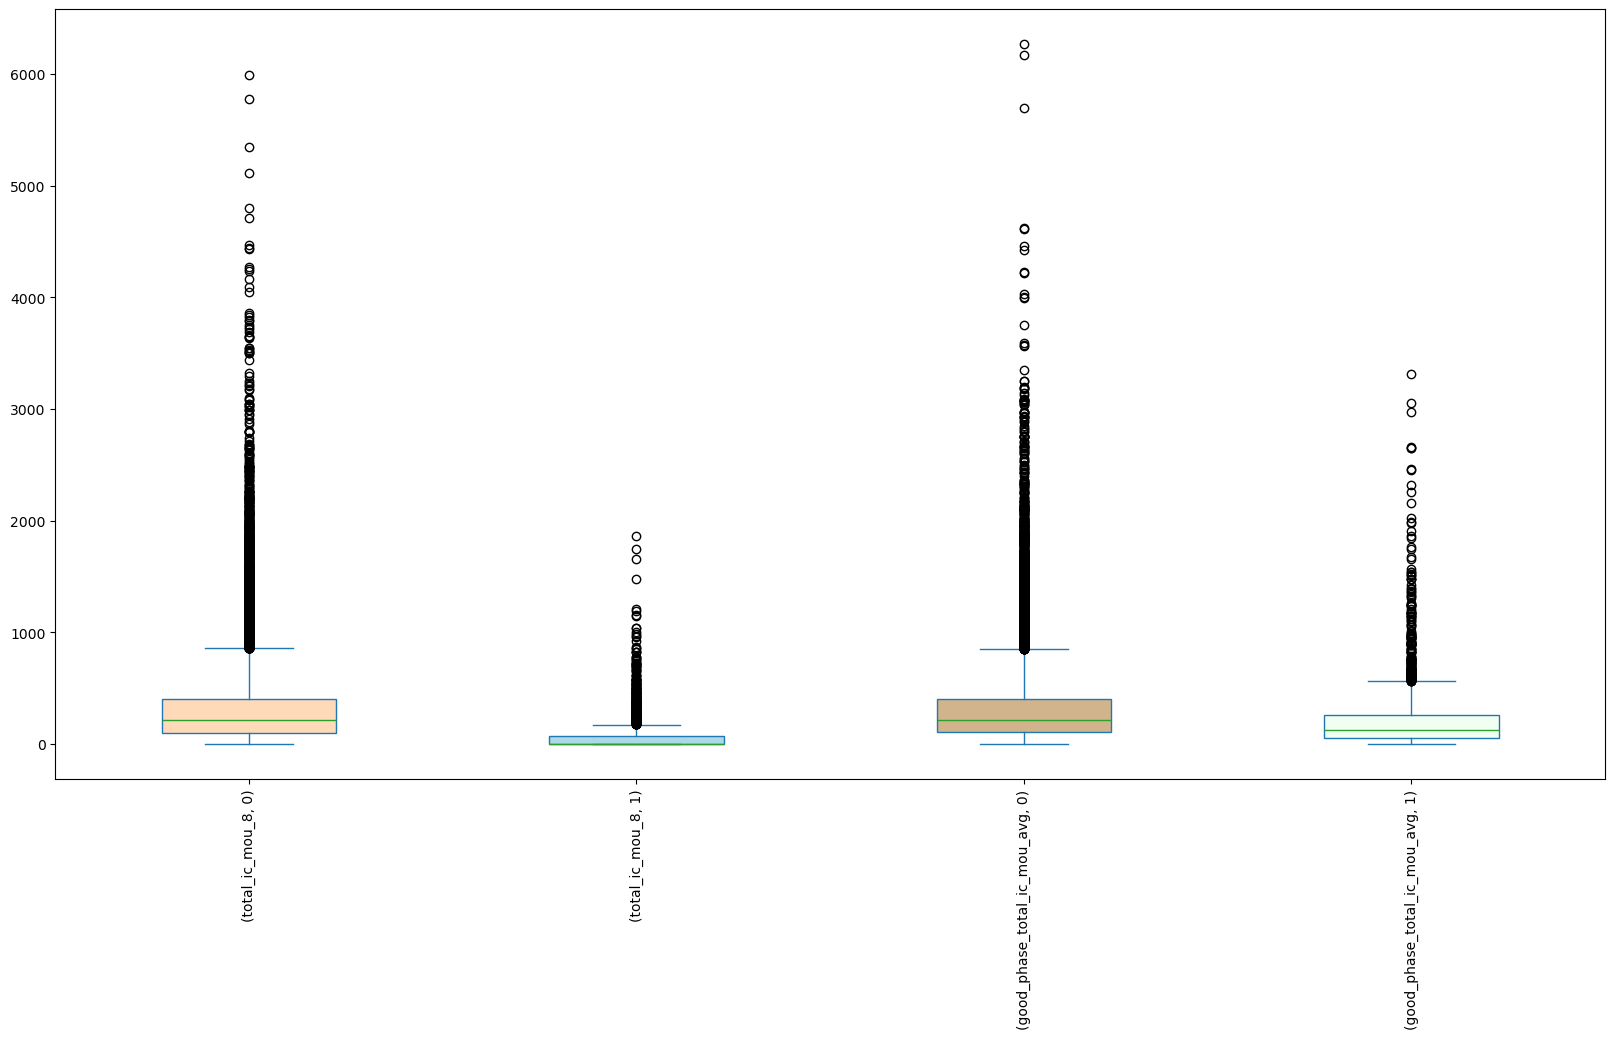

In [149]:
# Plotting the distribution for incoming calls

col_ic = [col for col in telecom_data_hv.columns if 'total_ic' in col]
fig,axes = plt.subplots(1,1,squeeze=False, figsize = (20, 10))
ax=axes[0][0]
colors = ['peachpuff', 'lightblue', 'tan', 'honeydew']
telecom_data_hv.pivot(columns='churn')[col_ic].plot(kind = 'box',ax=ax, patch_artist=True)
for patch, color in zip(ax.patches, colors):
    patch.set_facecolor(color)
ax.xaxis.set_tick_params(rotation=90)

In [150]:
ic = [col for col in telecom_data_hv.columns if 'ic' in col]

In [151]:
# Printing the top correlations

print("Top Correlations \n")
print('----------------- \n')
print(top_correlations(telecom_data_hv[ic],25))

Top Correlations 

----------------- 

loc_ic_mou_8                   total_ic_mou_8                   0.887481
good_phase_loc_ic_mou_avg      good_phase_total_ic_mou_avg      0.886415
std_ic_t2m_mou_8               std_ic_mou_8                     0.876156
good_phase_std_ic_t2m_mou_avg  good_phase_std_ic_mou_avg        0.826701
good_phase_loc_ic_t2m_mou_avg  good_phase_loc_ic_mou_avg        0.820487
loc_ic_mou_8                   good_phase_loc_ic_mou_avg        0.819680
total_ic_mou_8                 good_phase_total_ic_mou_avg      0.800183
loc_ic_t2t_mou_8               good_phase_loc_ic_t2t_mou_avg    0.757369
std_ic_t2t_mou_8               std_ic_mou_8                     0.736808
loc_ic_mou_8                   good_phase_total_ic_mou_avg      0.734984
loc_ic_t2f_mou_8               good_phase_loc_ic_t2f_mou_avg    0.731563
total_ic_mou_8                 good_phase_loc_ic_mou_avg        0.716892
good_phase_loc_ic_t2m_mou_avg  good_phase_total_ic_mou_avg      0.707181
isd_ic_mou_8

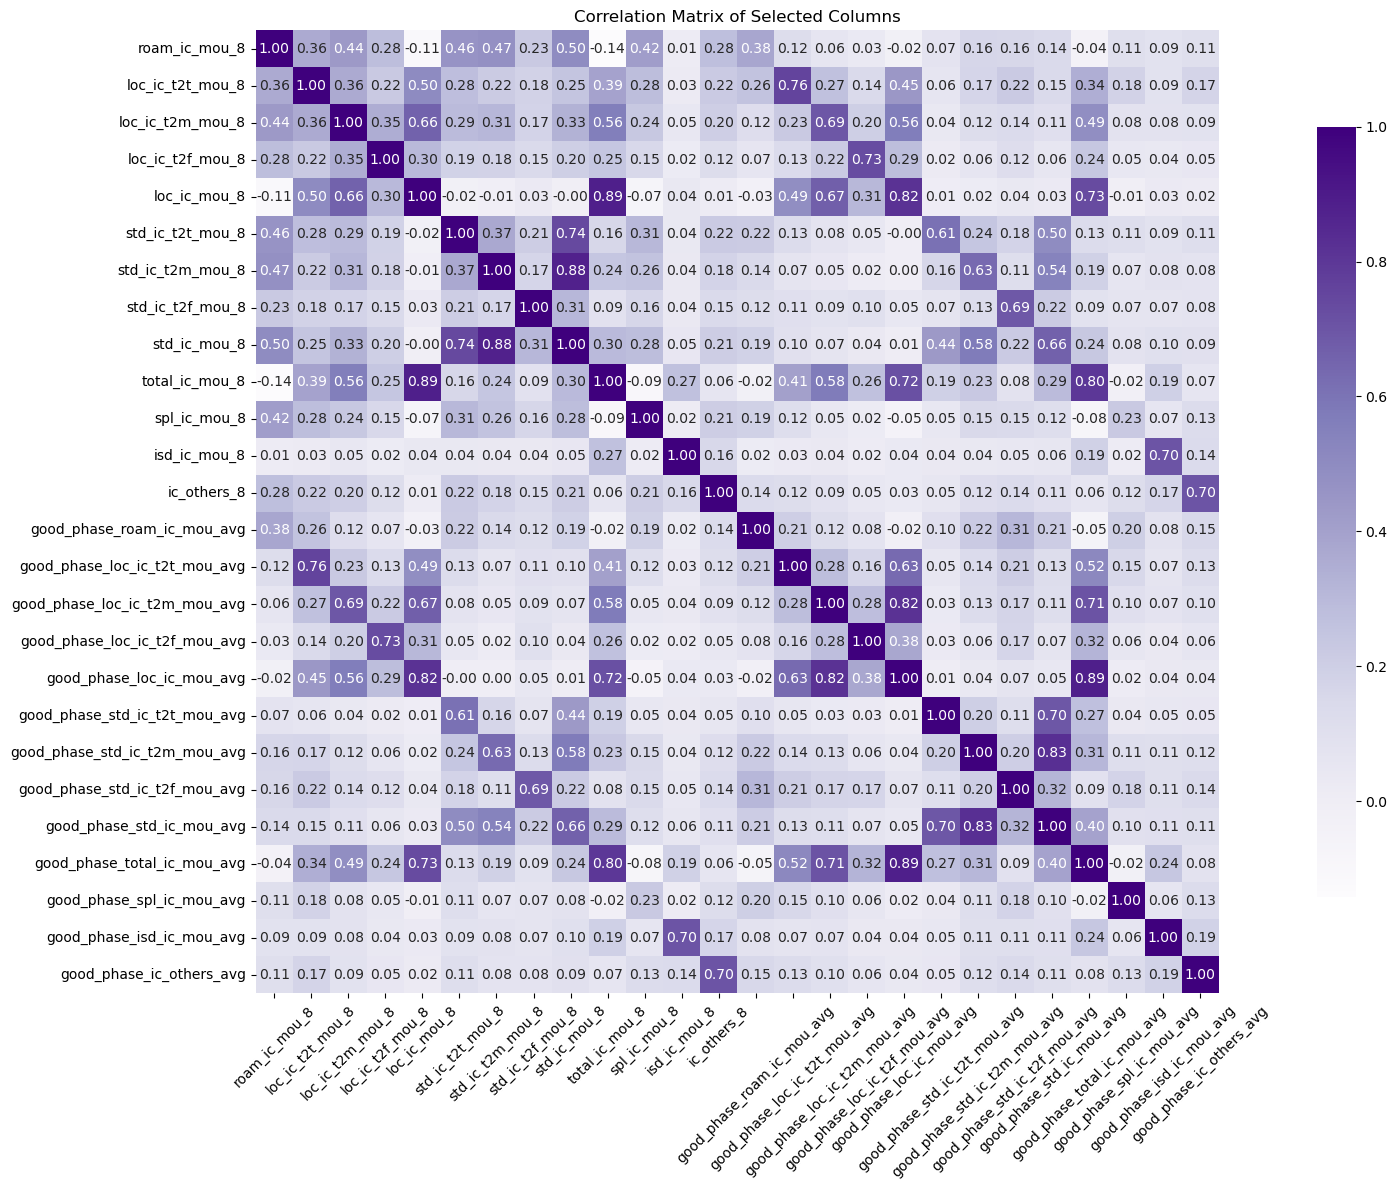

In [152]:
correlation_matrix = telecom_data_hv[ic].corr()

plt.figure(figsize=(20, 12))

# Create a heatmap with the correlation matrix
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='Purples', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Selected Columns')
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Show the plot
plt.tight_layout()
plt.show()

In [153]:
# Dropping columns with more than 75% correlation
telecom_data_hv.drop(['loc_ic_mou_8','good_phase_loc_ic_mou_avg','std_ic_t2m_mou_8','good_phase_std_ic_mou_avg','good_phase_loc_ic_t2m_mou_avg','good_phase_loc_ic_t2t_mou_avg',
         'good_phase_loc_ic_t2f_mou_avg'],axis=1,inplace=True)
telecom_data_hv.shape

(30007, 78)

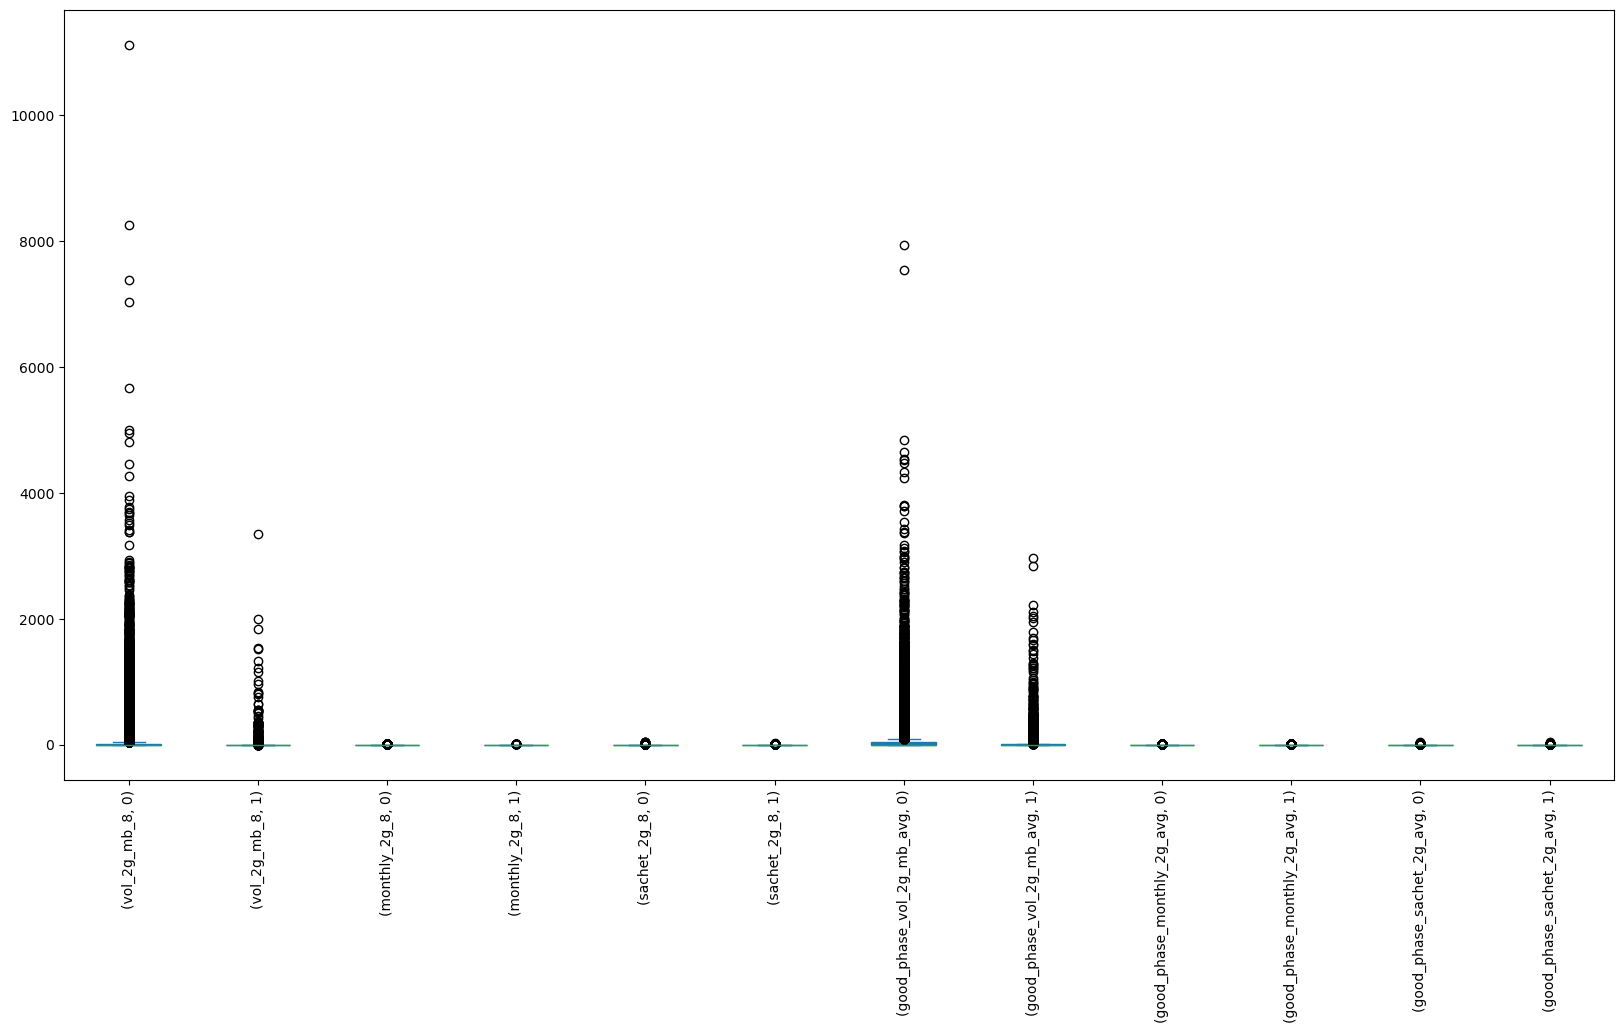

In [154]:
# plotting the distribution for  2g data
col_2g = [col for col in telecom_data_hv.columns if '2g' in col]

fig,axes = plt.subplots(1,1,squeeze=False, figsize = (20,10))
ax=axes[0][0]
colors = ['peachpuff', 'lightblue', 'tan', 'honeydew']
telecom_data_hv.pivot(columns='churn')[col_2g].plot(kind = 'box',ax=ax,patch_artist=True)
for patch, color in zip(ax.patches, colors):
    patch.set_facecolor(color)
ax.xaxis.set_tick_params(rotation=90)

In [155]:
# Printing the top correlations

print("Top Correlations \n")
print('----------------- \n')
print(top_correlations(telecom_data_hv[col_2g],5))

Top Correlations 

----------------- 

sachet_2g_8               good_phase_sachet_2g_avg     0.670625
vol_2g_mb_8               good_phase_vol_2g_mb_avg     0.652700
monthly_2g_8              good_phase_monthly_2g_avg    0.605800
good_phase_vol_2g_mb_avg  good_phase_monthly_2g_avg    0.419200
vol_2g_mb_8               monthly_2g_8                 0.355594
dtype: float64


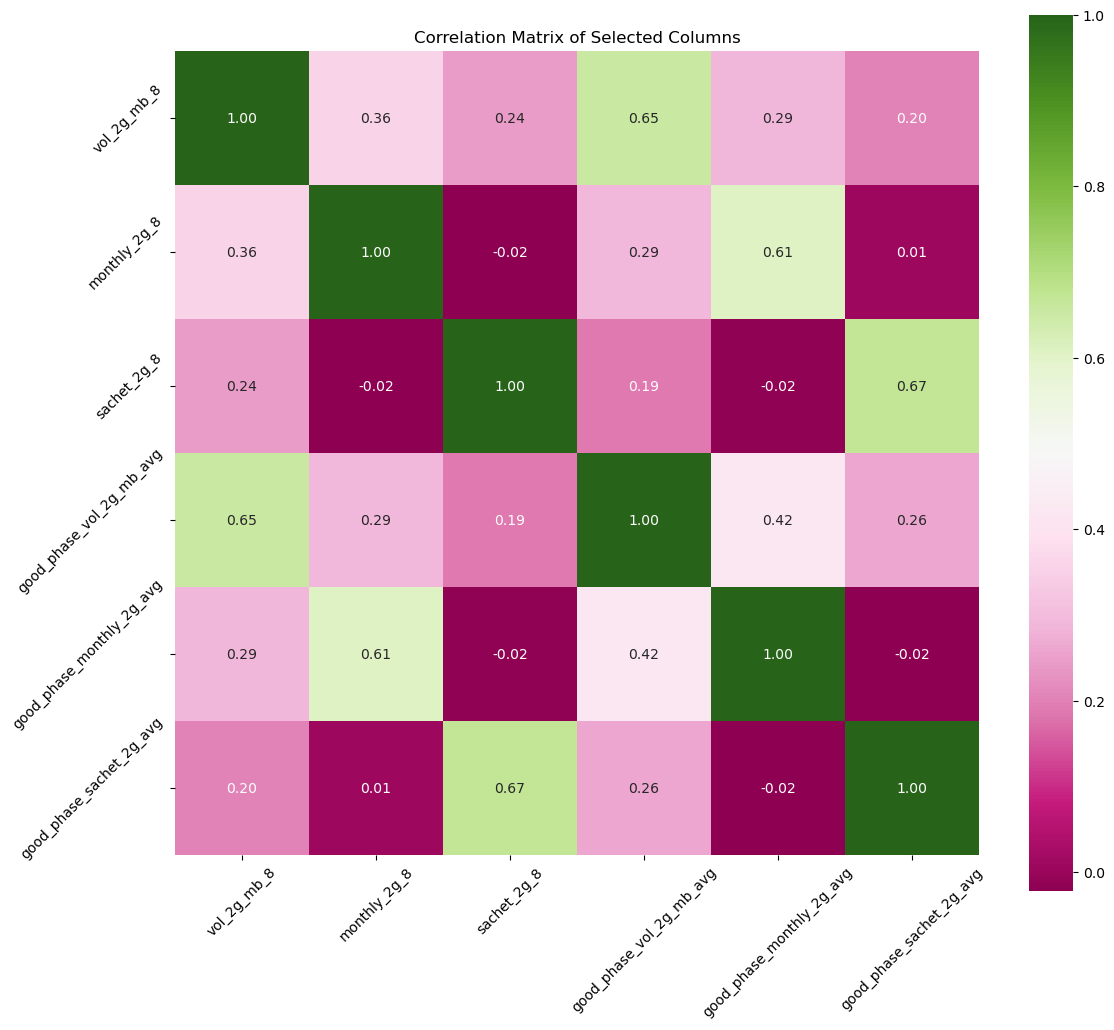

In [156]:
correlation_matrix = telecom_data_hv[col_2g].corr()

plt.figure(figsize=(12, 12))

# Create a heatmap with the correlation matrix
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='PiYG', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Selected Columns')
plt.xticks(rotation=45)
plt.yticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

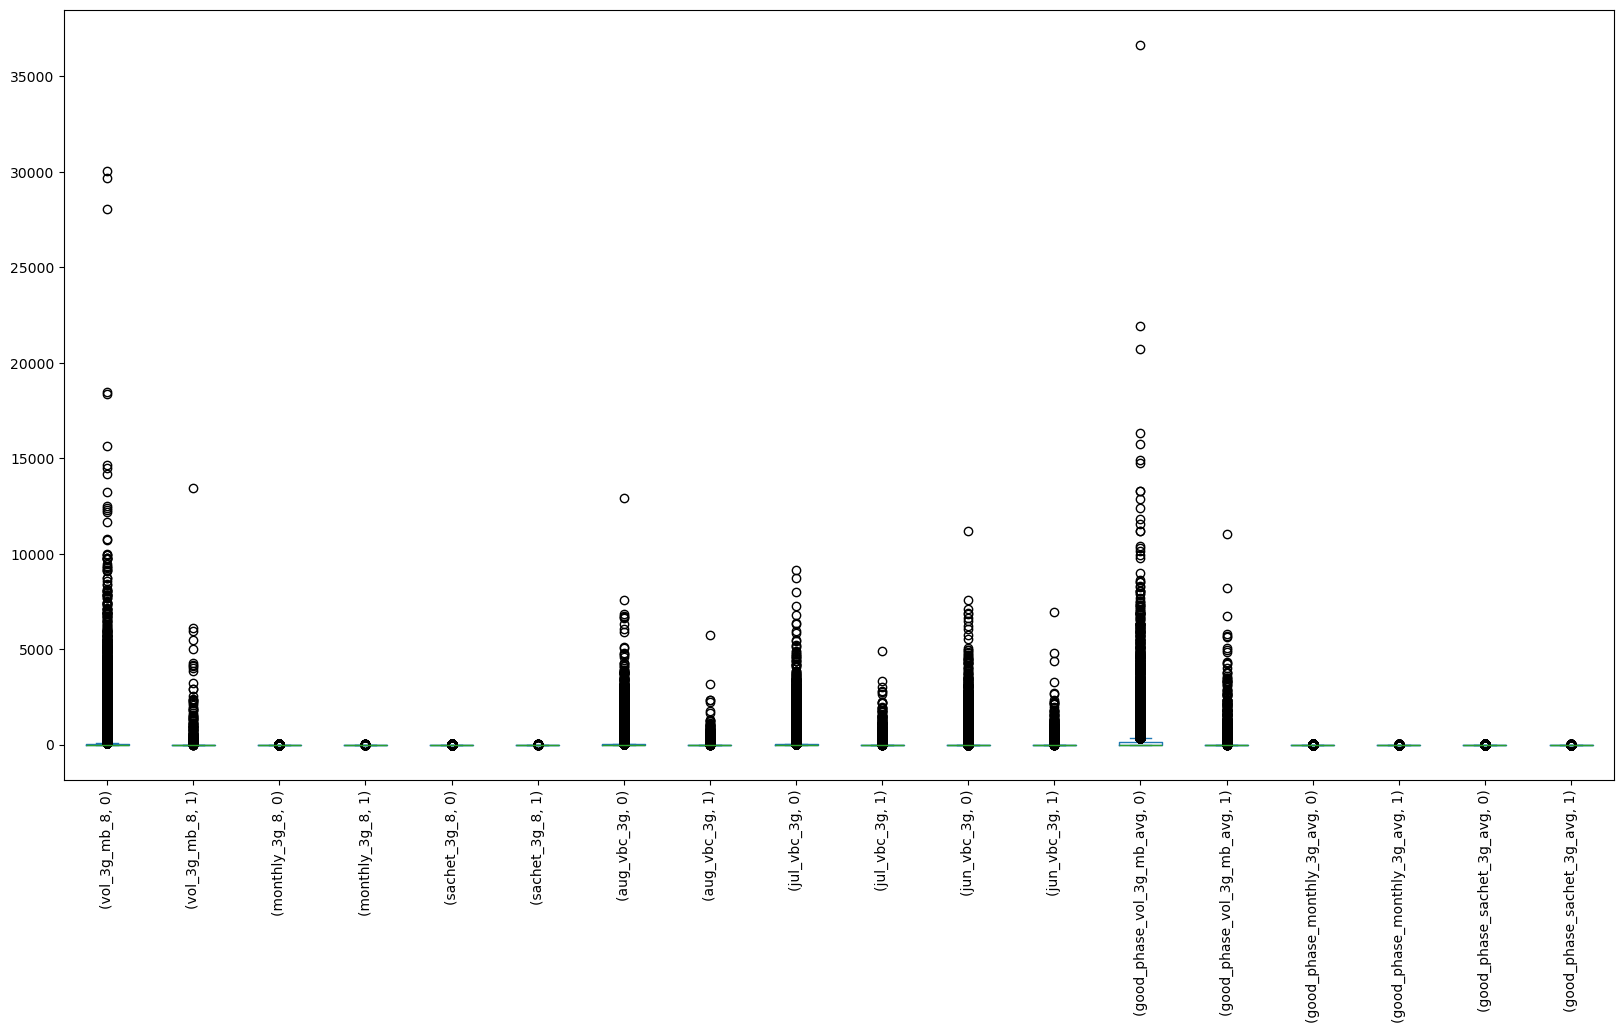

In [157]:
# Plotting the distribution for  3g data

col_3g = [col for col in telecom_data_hv.columns if '3g' in col]

fig,axes = plt.subplots(1,1,squeeze=False, figsize = (20, 10))
ax=axes[0][0]

telecom_data_hv.pivot(columns='churn')[col_3g].plot(kind = 'box',ax=ax)

ax.xaxis.set_tick_params(rotation=90)

In [158]:
# Printing the top correlations

print("Top Correlations \n")
print('----------------- \n')
print(top_correlations(telecom_data_hv[col_3g],5))

Top Correlations 

----------------- 

vol_3g_mb_8               good_phase_vol_3g_mb_avg     0.761570
aug_vbc_3g                jul_vbc_3g                   0.710999
monthly_3g_8              good_phase_monthly_3g_avg    0.693932
jul_vbc_3g                jun_vbc_3g                   0.684770
good_phase_vol_3g_mb_avg  good_phase_monthly_3g_avg    0.681742
dtype: float64


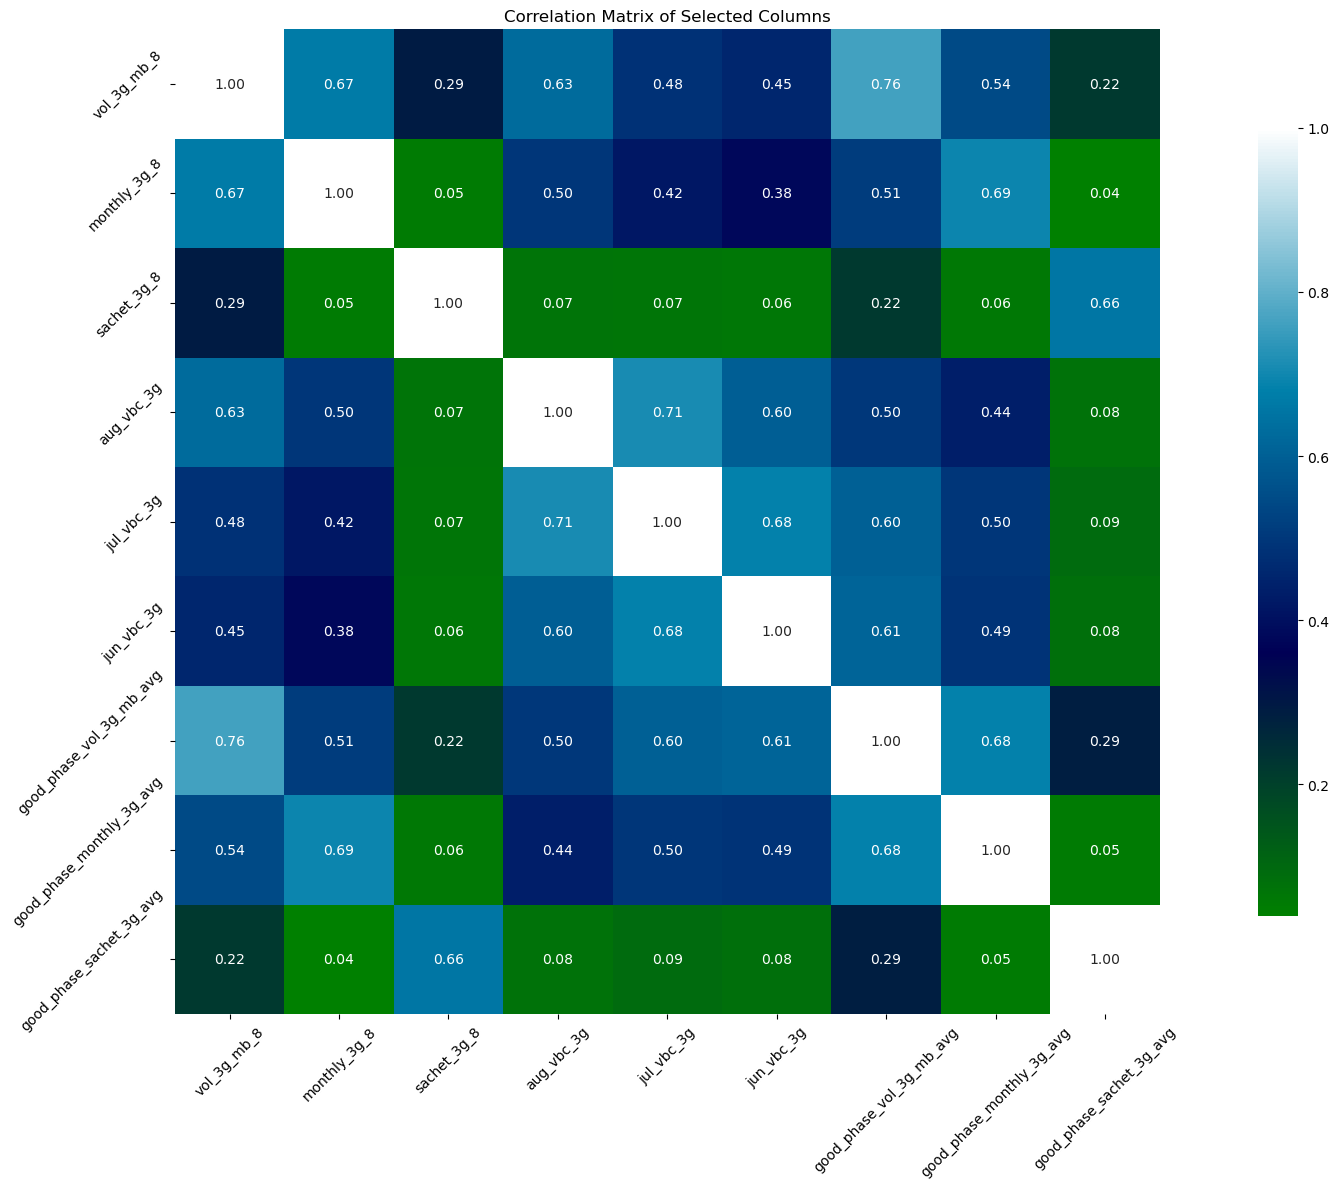

In [159]:
correlation_matrix = telecom_data_hv[col_3g].corr()

plt.figure(figsize=(20, 12))

# Create a heatmap with the correlation matrix
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='ocean', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Selected Columns')
plt.xticks(rotation=45)
plt.yticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

In [160]:
telecom_data_hv.drop('good_phase_vol_3g_mb_avg',axis=1,inplace=True)
telecom_data_hv.shape

(30007, 77)

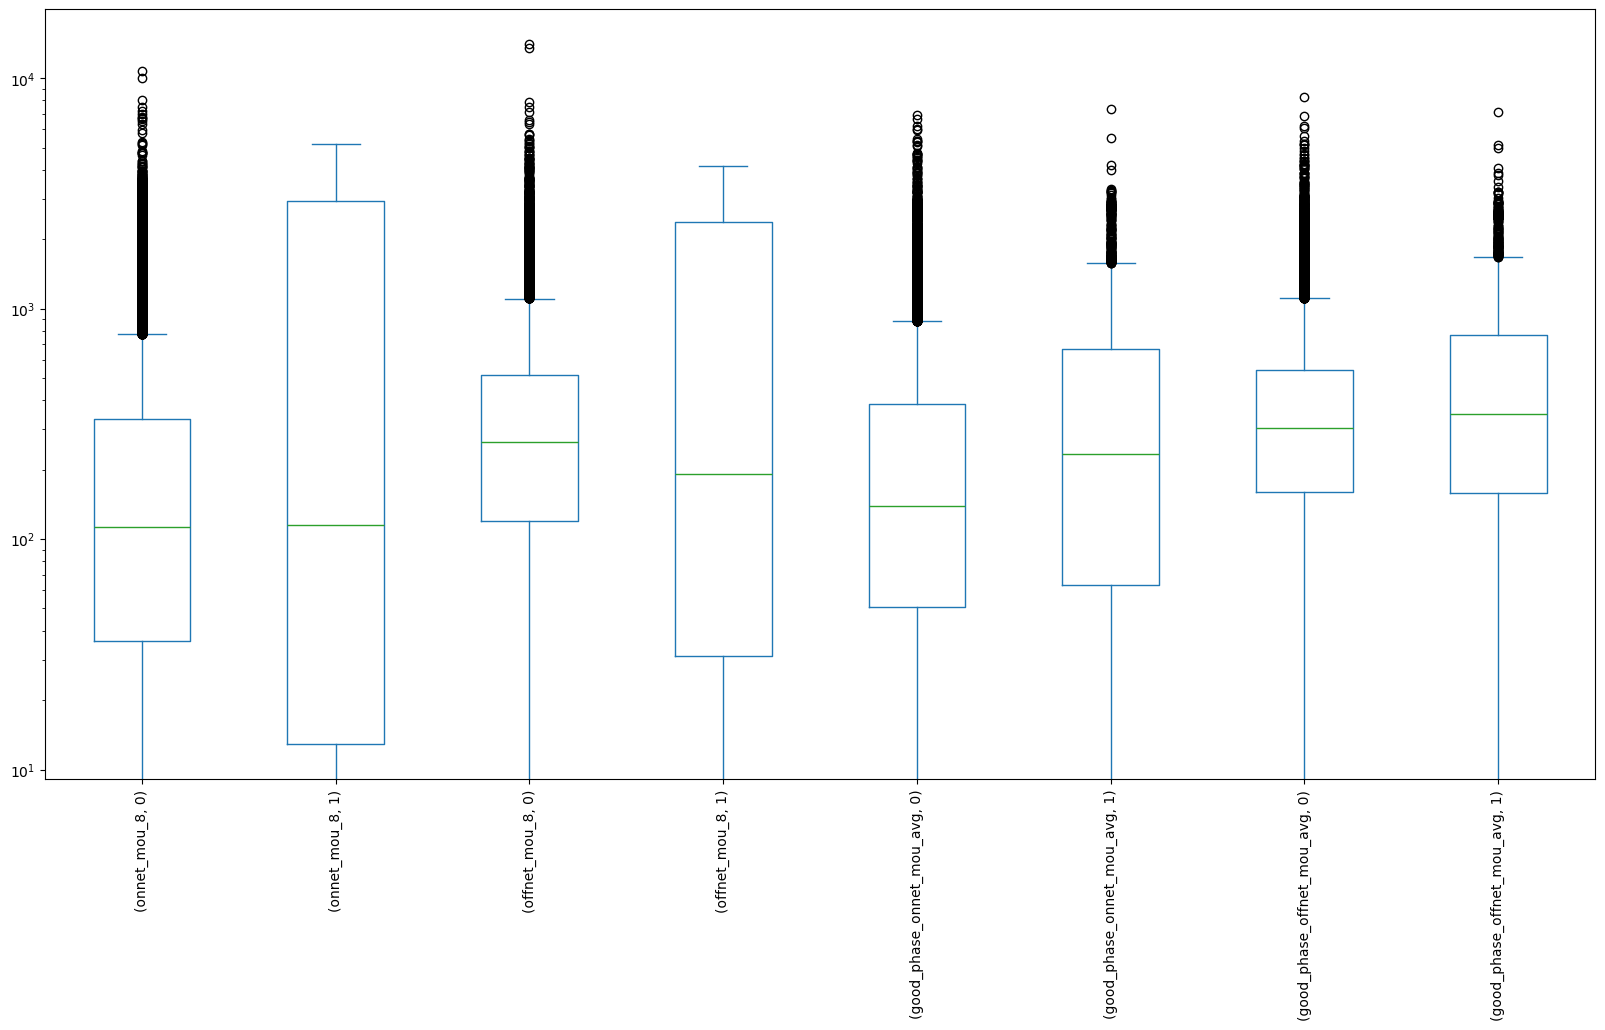

In [161]:
# plotting the distribution for onnet and offnet
col_on= [col for col in telecom_data_hv.columns if 'net' in col]

fig,axes = plt.subplots(1,1,squeeze=False, figsize = (20, 10))
ax=axes[0][0]

telecom_data_hv.pivot(columns='churn')[col_on].plot(kind = 'box',ax=ax)

ax.xaxis.set_tick_params(rotation=90)
plt.yscale('log')

In [162]:
# Printing the top correlations

print("Top Correlations \n")
print('----------------- \n')
print(top_correlations(telecom_data_hv[col_on],5))

Top Correlations 

----------------- 

onnet_mou_8               good_phase_onnet_mou_avg     0.608253
offnet_mou_8              good_phase_offnet_mou_avg    0.600980
onnet_mou_8               offnet_mou_8                 0.470741
good_phase_onnet_mou_avg  good_phase_offnet_mou_avg    0.150840
onnet_mou_8               good_phase_offnet_mou_avg    0.120803
dtype: float64


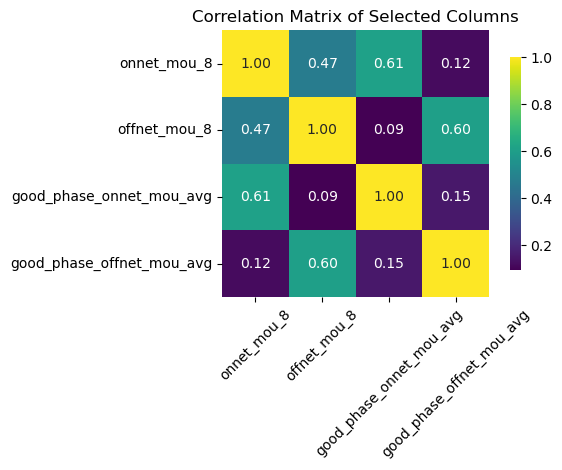

In [163]:
correlation_matrix = telecom_data_hv[col_on].corr()


# Create a heatmap with the correlation matrix
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='viridis', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Selected Columns')
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Show the plot
plt.tight_layout()
plt.show()

In [164]:
# Dropping columns with more than 75 % correlation

telecom_data_hv.drop('good_phase_onnet_mou_avg',axis=1,inplace=True)
telecom_data_hv.shape

(30007, 76)

In [165]:
# Getting top correlation for entire dataframe


print("Top Correlations \n")
print('----------------- \n')
print(top_correlations(telecom_data_hv[telecom_data_hv.columns.tolist()[1:]], 20))

Top Correlations 

----------------- 

arpu_8                           total_rech_amt_8                   0.939631
onnet_mou_8                      std_og_t2t_mou_8                   0.927813
total_og_mou_8                   total_mou_8                        0.902096
roam_ic_mou_8                    roam_og_mou_8                      0.895482
offnet_mou_8                     std_og_t2m_mou_8                   0.892762
total_rech_data_8                sachet_2g_8                        0.872518
good_phase_total_rech_data_avg   good_phase_sachet_2g_avg           0.866661
good_phase_offnet_mou_avg        good_phase_std_og_t2m_mou_avg      0.853202
max_rech_data_8                  av_rech_amt_data_8                 0.828321
loc_og_t2t_mou_8                 loc_og_mou_8                       0.816566
av_rech_amt_data_8               vol_3g_mb_8                        0.808322
total_ic_mou_8                   good_phase_total_ic_mou_avg        0.800183
good_phase_max_rech_data_max     good

In [166]:
# Dropping columns with more than 75 % correlation

col_to_drop=['arpu_8','good_phase_sachet_2g_avg','sachet_2g_8','std_og_t2t_mou_8','offnet_mou_8','good_phase_std_og_t2m_mou_avg',
             'loc_og_t2t_mou_8']
telecom_data_hv.drop(col_to_drop,axis=1,inplace=True)
telecom_data_hv.shape

(30007, 69)

### Train-Test Split

In [167]:
y=telecom_data_hv['churn'].astype(int)

In [168]:
X = telecom_data_hv.drop(['mobile_number','churn'], axis=1)

In [169]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

### Dealing with class imbalance(SMOTE)

In [170]:
sm = SMOTE(random_state=27)

In [171]:
y_train=y_train.astype(int)

In [172]:
X_train, y_train = sm.fit_resample(X_train, y_train)

### Feature Scaling

In [173]:
scaler = StandardScaler()

In [174]:
X_train = scaler.fit_transform(X_train)

In [175]:
X_test = scaler.transform(X_test)

### Modelling with Logistic Regression

In [268]:
logsk = LogisticRegression(C=1e9)
#logsk.fit(X_train[col], y_train)
logsk.fit(X_train, y_train)
# Predicted probabilities
y_pred = logsk.predict_proba(X_test)
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]
# Let's see the head
y_pred_1.head()

1
0  1.378554e-05
1  4.067486e-07
2  2.506877e-04
3  5.125413e-03
4  9.530147e-03

In [269]:
y_test_df = pd.DataFrame(y_test)
y_test_df.head(10)

churn
34015      0
16941      0
84180      0
68533      0
39804      0
55540      0
54035      0
13809      0
1000       0
91705      0

In [270]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df,y_pred_1],axis=1)
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'churn_Prob'})
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['CustID','churn','churn_Prob'], axis=1)
# Let's see the head of y_pred_final
y_pred_final.head()

CustID  churn    churn_Prob
0   34015      0  1.378554e-05
1   16941      0  4.067486e-07
2   84180      0  2.506877e-04
3   68533      0  5.125413e-03
4   39804      0  9.530147e-03

In [271]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
y_pred_final['predicted'] = y_pred_final.churn_Prob.map( lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_pred_final.head()

CustID  churn    churn_Prob  predicted
0   34015      0  1.378554e-05          0
1   16941      0  4.067486e-07          0
2   84180      0  2.506877e-04          0
3   68533      0  5.125413e-03          0
4   39804      0  9.530147e-03          0

In [272]:
confusion = metrics.confusion_matrix( y_pred_final.churn, y_pred_final.predicted )
confusion

array([[8085,  103],
       [ 501,  314]])

In [273]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.churn_Prob.map(lambda x: 1 if x > i else 0)
y_pred_final.head()

CustID  churn    churn_Prob  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0   34015      0  1.378554e-05          0    1    0    0    0    0    0    0   
1   16941      0  4.067486e-07          0    1    0    0    0    0    0    0   
2   84180      0  2.506877e-04          0    1    0    0    0    0    0    0   
3   68533      0  5.125413e-03          0    1    0    0    0    0    0    0   
4   39804      0  9.530147e-03          0    1    0    0    0    0    0    0   

   0.7  0.8  0.9  
0    0    0    0  
1    0    0    0  
2    0    0    0  
3    0    0    0  
4    0    0    0

     prob  accuracy     sensi     speci
0.0   0.0  0.090525  1.000000  0.000000
0.1   0.1  0.824503  0.793865  0.827553
0.2   0.2  0.899478  0.699387  0.919394
0.3   0.3  0.925580  0.611043  0.956888
0.4   0.4  0.933022  0.509202  0.975208
0.5   0.5  0.932911  0.385276  0.987421
0.6   0.6  0.931134  0.311656  0.992794
0.7   0.7  0.930357  0.276074  0.995481
0.8   0.8  0.928579  0.239264  0.997191
0.9   0.9  0.921693  0.144785  0.999023


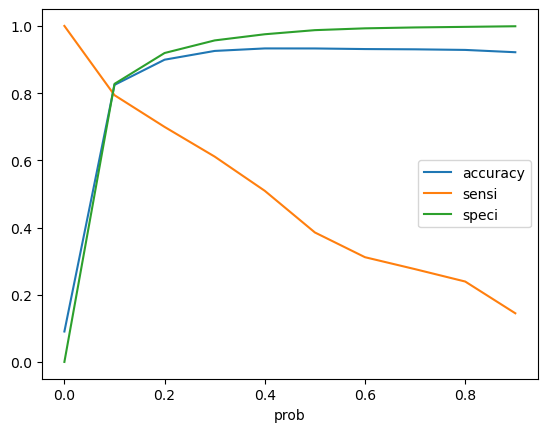

In [274]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_pred_final.churn, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)
cutoff_df.plot('prob', ['accuracy','sensi','speci'])
plt.show()

In [187]:
#Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.churn, y_pred_final.predicted)

0.8568810396534489

In [188]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

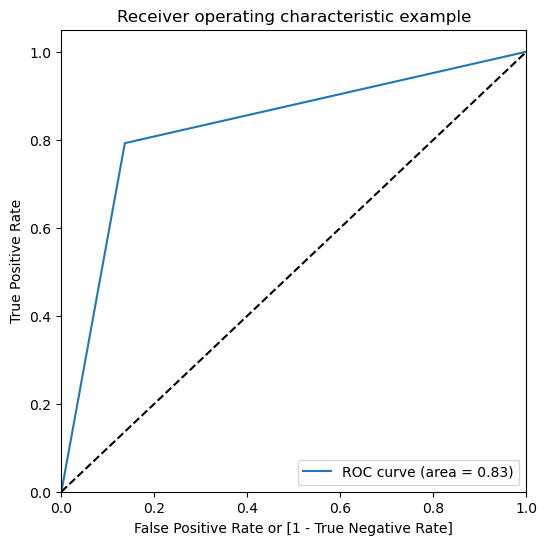

(array([0.        , 0.13642214, 1.        ]),
 array([0.        , 0.79218472, 1.        ]),
 array([inf,  1.,  0.]))

In [189]:
draw_roc(y_pred_final.churn, y_pred_final.predicted)

In [190]:
#draw_roc(y_pred_final.Churn, y_pred_final.predicted)
"{:2.2f}".format(metrics.roc_auc_score(y_pred_final.churn, y_pred_final.churn_Prob))

'0.89'

In [265]:
pca = PCA(random_state=42)
pca.fit(X_train)

PCA(random_state=42)

In [266]:
pca.components_

array([[ 2.77384368e-01,  4.81876076e-03,  9.09587698e-03, ...,
        -1.03603659e-04, -9.72009033e-05, -3.08198505e-05],
       [-7.51374110e-02, -1.85520403e-02, -2.47262012e-02, ...,
        -7.24735960e-05, -8.84283781e-05,  7.22717789e-05],
       [ 8.71399213e-02,  2.52550681e-02,  3.52445912e-02, ...,
         2.30009723e-06, -3.16114211e-06,  4.72961337e-05],
       ...,
       [ 5.94075406e-06, -1.72836513e-05, -7.31838562e-05, ...,
         2.15031199e-02, -2.42874251e-02, -4.04452679e-02],
       [-8.56799123e-06, -2.57598387e-05,  4.22499198e-05, ...,
        -1.47430509e-03,  1.32952749e-03,  5.45156095e-03],
       [-7.94063471e-16,  1.44287538e-15,  1.40453619e-15, ...,
        -9.04094508e-15, -9.25193082e-15,  7.63603590e-15]])

In [267]:
pca.explained_variance_ratio_

array([2.71070467e-01, 1.74619811e-01, 1.62817891e-01, 9.63335727e-02,
       5.62657479e-02, 4.28731256e-02, 3.32202269e-02, 3.07651432e-02,
       2.51499777e-02, 1.82268237e-02, 1.63409506e-02, 9.99851248e-03,
       9.34831929e-03, 8.22051000e-03, 6.81489831e-03, 5.06749172e-03,
       4.72895530e-03, 4.48489726e-03, 3.89643112e-03, 2.88284944e-03,
       2.75231444e-03, 2.05034101e-03, 1.83758073e-03, 1.35623362e-03,
       1.30760720e-03, 1.18922334e-03, 1.13357335e-03, 1.00656676e-03,
       7.40478095e-04, 6.91560605e-04, 6.13305174e-04, 4.15886757e-04,
       2.97384903e-04, 2.69586743e-04, 2.54152366e-04, 2.23942210e-04,
       1.81362008e-04, 1.18830162e-04, 9.45979583e-05, 8.19646108e-05,
       6.18180261e-05, 5.81307860e-05, 3.42707147e-05, 2.68409231e-05,
       2.05010926e-05, 1.85111477e-05, 1.37757073e-05, 1.01873698e-05,
       4.00990262e-06, 3.73500310e-06, 2.58987997e-06, 1.17775342e-06,
       8.75806497e-07, 1.80902114e-07, 1.09009276e-07, 4.44990301e-08,
      

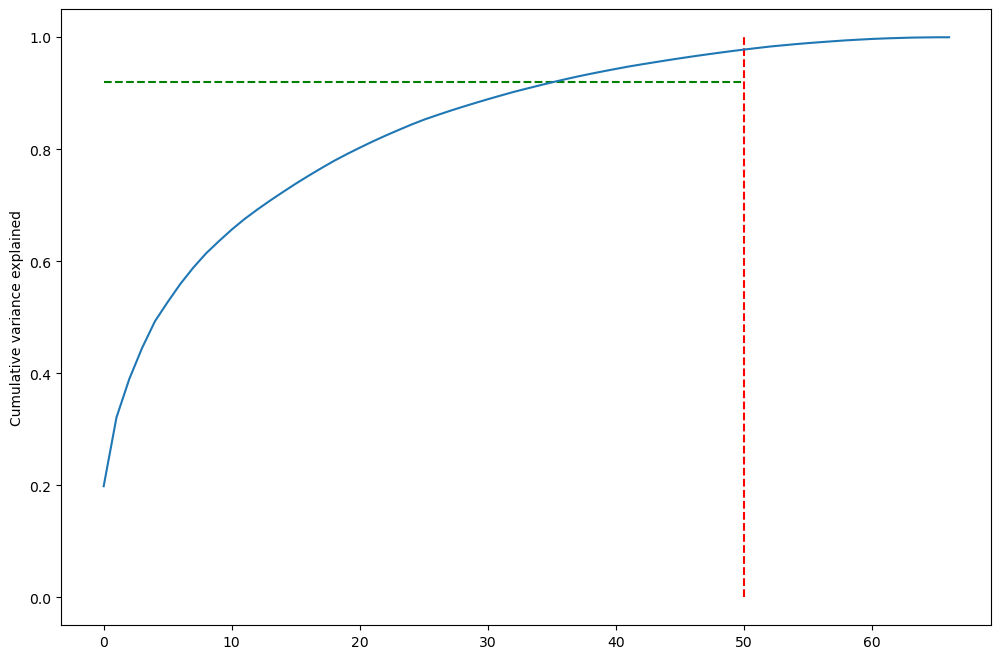

In [194]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)
fig = plt.figure(figsize=[12,8])
plt.vlines(x=50, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.92, xmax=50, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

##### Observation: We can see that 60 components contribute to almost 92 percent of the variance. So we can perform PCA with 50 components 

In [195]:
pca_final = IncrementalPCA(n_components=50)
df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(43950, 50)

In [196]:
corrmat = np.corrcoef(df_train_pca.transpose())
corrmat.shape

(50, 50)

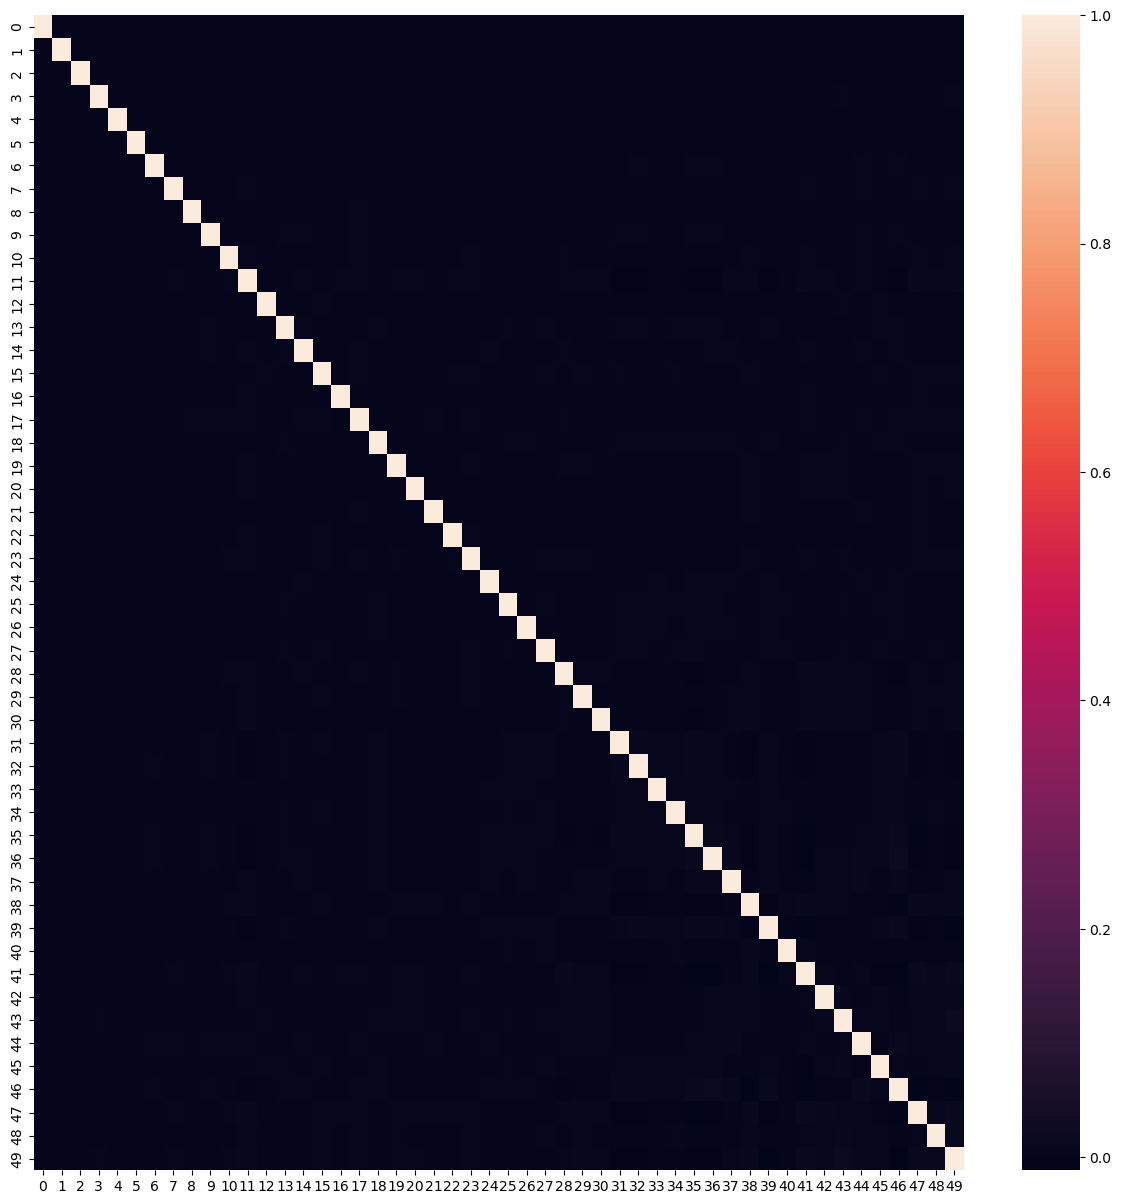

In [197]:
plt.figure(figsize=[15,15])
sns.heatmap(corrmat, annot=False)
plt.show()

In [198]:
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(6002, 50)

In [199]:
learner_pca = LogisticRegression()

In [200]:
model_pca = learner_pca.fit(df_train_pca, y_train)

In [201]:
pred_probs_test = model_pca.predict_proba(df_test_pca)

In [202]:
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test[:,1]))

'0.89'

In [203]:
y_pred = model_pca.predict(df_test_pca)

In [204]:
confusion = metrics.confusion_matrix(y_pred_final.churn, y_pred_final.predicted)
confusion

array([[4697,  742],
       [ 117,  446]])

In [205]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [206]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7921847246891652

In [207]:
# Let us calculate specificity
TN / float(TN+FP)

0.8635778635778636

In [208]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.1364221364221364


In [209]:
# positive predictive value 
print (TP / float(TP+FP))

0.37542087542087543


In [210]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9756958869962609


In [211]:
metrics.accuracy_score(y_pred_final.churn, y_pred_final.predicted)

0.8568810396534489

In [212]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.churn_Prob.map(lambda x: 1 if x > i else 0)
y_pred_final.head()

CustID  churn    churn_Prob  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0   34015      0  1.456382e-03          0    1    0    0    0    0    0    0   
1   16941      0  4.718823e-08          0    1    0    0    0    0    0    0   
2   84180      0  2.530888e-03          0    1    0    0    0    0    0    0   
3   68533      0  2.937911e-01          0    1    1    1    0    0    0    0   
4   39804      0  1.386652e-02          0    1    0    0    0    0    0    0   

   0.7  0.8  0.9  
0    0    0    0  
1    0    0    0  
2    0    0    0  
3    0    0    0  
4    0    0    0

In [213]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_pred_final.churn, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.093802  1.000000  0.000000
0.1   0.1  0.493835  0.946714  0.446957
0.2   0.2  0.630623  0.911190  0.601581
0.3   0.3  0.724758  0.873890  0.709322
0.4   0.4  0.802899  0.838366  0.799228
0.5   0.5  0.856881  0.792185  0.863578
0.6   0.6  0.889370  0.731794  0.905681
0.7   0.7  0.912196  0.667851  0.937489
0.8   0.8  0.920526  0.534636  0.960471
0.9   0.9  0.928024  0.406750  0.981982


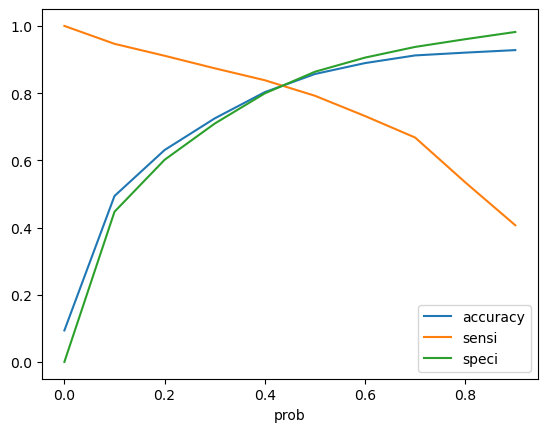

In [214]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [215]:
y_pred_final['final_predicted'] = y_pred_final.churn_Prob.map( lambda x: 1 if x > 0.3 else 0)
y_pred_final.head()

CustID  churn    churn_Prob  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0   34015      0  1.456382e-03          0    1    0    0    0    0    0    0   
1   16941      0  4.718823e-08          0    1    0    0    0    0    0    0   
2   84180      0  2.530888e-03          0    1    0    0    0    0    0    0   
3   68533      0  2.937911e-01          0    1    1    1    0    0    0    0   
4   39804      0  1.386652e-02          0    1    0    0    0    0    0    0   

   0.7  0.8  0.9  final_predicted  
0    0    0    0                0  
1    0    0    0                0  
2    0    0    0                0  
3    0    0    0                0  
4    0    0    0                0

In [216]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.churn, y_pred_final.final_predicted)

0.724758413862046

In [217]:
confusion2 = metrics.confusion_matrix(y_pred_final.churn, y_pred_final.final_predicted )
confusion2

array([[3858, 1581],
       [  71,  492]])

In [218]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [219]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8738898756660746

In [220]:
# Let us calculate specificity
TN / float(TN+FP)

0.7093215664644236

In [221]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.2906784335355764


In [222]:
# Positive predictive value 
print (TP / float(TP+FP))

0.23733719247467439


In [223]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9819292440824637


In [224]:
from sklearn.metrics import precision_recall_curve

In [225]:
p, r, thresholds = precision_recall_curve(y_pred_final.churn, y_pred_final.churn_Prob)

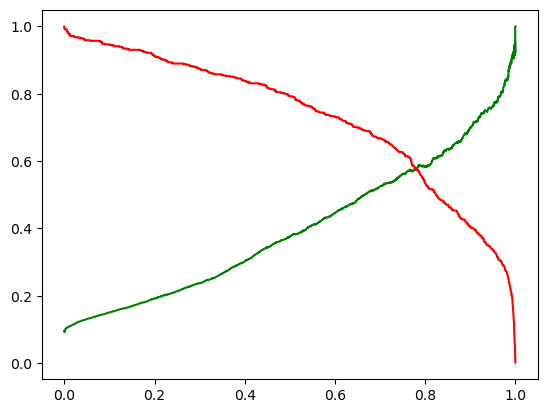

In [226]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Using Decision Trees

In [227]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

In [228]:
X_train.shape, X_test.shape

((21004, 67), (9003, 67))

In [229]:
from sklearn.tree import DecisionTreeClassifier

In [230]:
dt_base = DecisionTreeClassifier(random_state=42, max_depth=4)

In [231]:
dt_base.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [232]:
y_train_pred = dt_base.predict(X_train)
y_test_pred = dt_base.predict(X_test)

In [233]:
from sklearn.metrics import classification_report

In [234]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      8188
           1       0.73      0.45      0.56       815

    accuracy                           0.94      9003
   macro avg       0.84      0.72      0.76      9003
weighted avg       0.93      0.94      0.93      9003



In [235]:
from sklearn.metrics import RocCurveDisplay

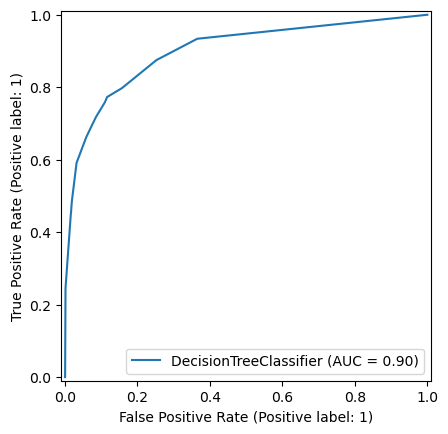

In [236]:
RocCurveDisplay.from_estimator(dt_base, X_test, y_test)

# Show the plot
plt.show()

In [237]:
from sklearn.model_selection import GridSearchCV

In [238]:
dt = DecisionTreeClassifier(random_state=42)

In [239]:
params = {
    "max_depth": [2,3,5,10,20],
    "min_samples_leaf": [5,10,20,50,100,500]
}

In [240]:
grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           cv=4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [241]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 30 candidates, totalling 120 fits
CPU times: user 670 ms, sys: 965 ms, total: 1.63 s
Wall time: 13.7 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 500]},
             scoring='accuracy', verbose=1)

In [242]:
grid_search.best_score_

0.9421062654732432

In [243]:
dt_best = grid_search.best_estimator_
dt_best

DecisionTreeClassifier(max_depth=2, min_samples_leaf=5, random_state=42)

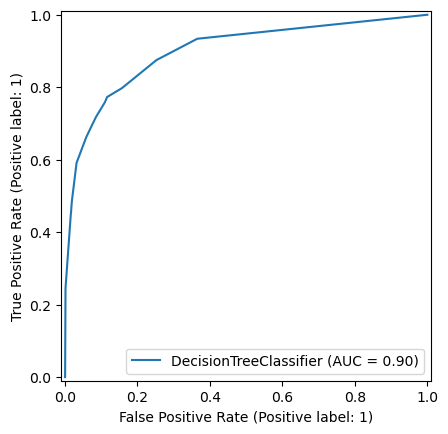

In [244]:
RocCurveDisplay.from_estimator(dt_base, X_test, y_test)
plt.show()

### Using Random Forest

In [245]:
from sklearn.ensemble import RandomForestClassifier

In [246]:
rf = RandomForestClassifier(n_estimators=10, max_depth=4, max_features=5, random_state=100, oob_score=True)

In [247]:
%%time
rf.fit(X_train, y_train)

CPU times: user 260 ms, sys: 428 ms, total: 687 ms
Wall time: 222 ms


RandomForestClassifier(max_depth=4, max_features=5, n_estimators=10,
                       oob_score=True, random_state=100)

In [248]:
rf.oob_score_

0.9396781565416111

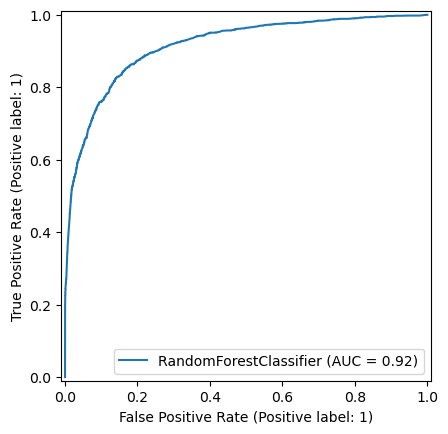

In [249]:
RocCurveDisplay.from_estimator(rf, X_train, y_train)
plt.show()

#### Hyper-parameter tuning for the Random Forest

In [250]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [251]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10, 25, 50, 100]
}

In [252]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [253]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 120 candidates, totalling 480 fits
CPU times: user 2.97 s, sys: 3.88 s, total: 6.85 s
Wall time: 1min 56s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [254]:
grid_search.best_score_

0.9434393448866882

In [255]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=10, min_samples_leaf=10, n_estimators=10,
                       n_jobs=-1, random_state=42)

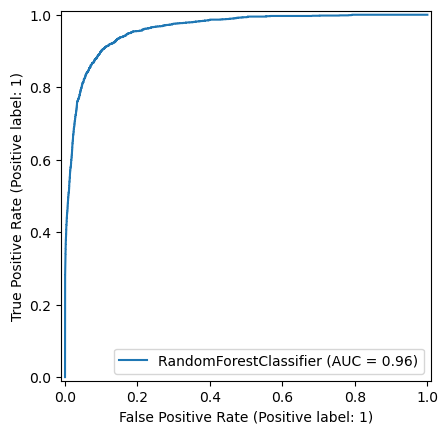

In [256]:
RocCurveDisplay.from_estimator(rf_best, X_train, y_train)
plt.show()

In [257]:
rf_best.feature_importances_

array([3.97225069e-02, 7.40833954e-02, 6.28363231e-02, 7.94473437e-03,
       1.26455446e-03, 2.90598959e-02, 2.80460574e-02, 3.36029524e-02,
       1.86015361e-02, 2.34384724e-03, 1.49927843e-03, 4.90368138e-02,
       2.76647421e-02, 4.42689115e-02, 1.06680964e-03, 8.39353063e-03,
       2.01069836e-03, 9.47941530e-03, 1.32510594e-01, 7.05986638e-03,
       2.07148973e-03, 4.43426631e-03, 4.42002530e-03, 5.41471809e-02,
       9.21138623e-03, 2.58331020e-02, 9.11284605e-03, 8.76447106e-03,
       1.77026955e-02, 1.59582108e-02, 5.92054964e-03, 0.00000000e+00,
       2.06789750e-03, 8.42548398e-06, 7.00214304e-03, 2.26256534e-03,
       1.75524407e-03, 2.51911628e-04, 5.23614371e-03, 9.64848570e-03,
       8.68141124e-03, 3.90439195e-03, 7.28369893e-03, 3.34269028e-03,
       8.21003501e-03, 4.13616395e-03, 5.21548733e-03, 3.08314356e-03,
       5.21887079e-03, 1.93561597e-03, 1.62947821e-03, 2.25985049e-03,
       8.17155962e-03, 7.94023654e-03, 5.49459803e-03, 1.36808092e-03,
      

In [258]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})

In [259]:
imp_df.sort_values(by="Imp", ascending=False)

Varname       Imp
63                      total_mou_8  0.136790
18                   total_ic_mou_8  0.132511
1                     roam_ic_mou_8  0.074083
2                     roam_og_mou_8  0.062836
23                 total_rech_amt_8  0.054147
11                   total_og_mou_8  0.049037
13                 loc_ic_t2m_mou_8  0.044269
0                       onnet_mou_8  0.039723
7                  std_og_t2f_mou_8  0.033603
5                      loc_og_mou_8  0.029060
6                  std_og_t2m_mou_8  0.028046
12                 loc_ic_t2t_mou_8  0.027665
25               last_day_rch_amt_8  0.025833
8                      isd_og_mou_8  0.018602
28               av_rech_amt_data_8  0.017703
29                      vol_2g_mb_8  0.015958
39       good_phase_roam_ic_mou_avg  0.009648
17                     std_ic_mou_8  0.009479
24                   max_rech_amt_8  0.009211
26                total_rech_data_8  0.009113
27                  max_rech_data_8  0.008764
40       good_phase_roam_og_mou_avg  0.008681
15                 std_ic_t2t_mou_8  0.008394
44      good_phase_total_og_mou_avg  0.008210
52    good_phase_total_rech_num_avg  0.008172
3                  loc_og_t2f_mou_8  0.007945
53      good_phase_max_rech_amt_max  0.007940
42        good_phase_spl_og_mou_avg  0.007284
19                     spl_ic_mou_8  0.007060
34                              aon  0.007002
30                      vol_3g_mb_8  0.005921
54  good_phase_last_day_rch_amt_avg  0.005495
38        good_phase_offnet_mou_avg  0.005236
48      good_phase_total_ic_mou_avg  0.005219
46    good_phase_std_ic_t2m_mou_avg  0.005215
21                      ic_others_8  0.004434
22                 total_rech_num_8  0.004420
45    good_phase_std_ic_t2t_mou_avg  0.004136
41    good_phase_loc_og_t2c_mou_avg  0.003904
64              decrease_mou_action  0.003599
60        good_phase_monthly_3g_avg  0.003556
43         good_phase_og_others_avg  0.003343
65         decrease_rech_amt_action  0.003276
47    good_phase_std_ic_t2f_mou_avg  0.003083
57  good_phase_av_rech_amt_data_avg  0.002806
56     good_phase_max_rech_data_max  0.002583
58         good_phase_vol_2g_mb_avg  0.002372
9                      spl_og_mou_8  0.002344
35                       aug_vbc_3g  0.002263
51         good_phase_ic_others_avg  0.002260
20                     isd_ic_mou_8  0.002071
32                     monthly_3g_8  0.002068
16                 std_ic_t2f_mou_8  0.002011
49        good_phase_spl_ic_mou_avg  0.001936
36                       jul_vbc_3g  0.001755
50        good_phase_isd_ic_mou_avg  0.001629
10                      og_others_8  0.001499
55   good_phase_total_rech_data_avg  0.001368
4                  loc_og_t2c_mou_8  0.001265
14                 loc_ic_t2f_mou_8  0.001067
62             decrease_arpu_action  0.000512
37                       jun_vbc_3g  0.000252
66              decrease_vbc_action  0.000164
59        good_phase_monthly_2g_avg  0.000161
33                      sachet_3g_8  0.000008
61         good_phase_sachet_3g_avg  0.000000
31                     monthly_2g_8  0.000000

In [260]:
correlation_matrix = corr_data.corr()
threshold = 0.8
high_corr_pairs = correlation_matrix[correlation_matrix.abs() > threshold].stack().reset_index()
high_corr_pairs = high_corr_pairs[high_corr_pairs['level_0'] != high_corr_pairs['level_1']]
high_corr_pairs

level_0                          level_1  \
1                             arpu_8                 total_rech_amt_8   
3                        onnet_mou_8                 std_og_t2t_mou_8   
5                       offnet_mou_8                 std_og_t2m_mou_8   
7                      roam_ic_mou_8                    roam_og_mou_8   
8                      roam_og_mou_8                    roam_ic_mou_8   
11                  loc_og_t2t_mou_8                     loc_og_mou_8   
13                  loc_og_t2m_mou_8                     loc_og_mou_8   
16                      loc_og_mou_8                 loc_og_t2t_mou_8   
17                      loc_og_mou_8                 loc_og_t2m_mou_8   
19                  std_og_t2t_mou_8                      onnet_mou_8   
21                  std_og_t2m_mou_8                     offnet_mou_8   
25                      std_og_mou_8                   total_og_mou_8   
27                      isd_og_mou_8        good_phase_isd_og_mou_avg   
30                    total_og_mou_8                     std_og_mou_8   
32                    total_og_mou_8                      total_mou_8   
37                      loc_ic_mou_8                   total_ic_mou_8   
38                      loc_ic_mou_8        good_phase_loc_ic_mou_avg   
41                  std_ic_t2m_mou_8                     std_ic_mou_8   
43                      std_ic_mou_8                 std_ic_t2m_mou_8   
45                    total_ic_mou_8                     loc_ic_mou_8   
47                    total_ic_mou_8      good_phase_total_ic_mou_avg   
52                  total_rech_amt_8                           arpu_8   
57                 total_rech_data_8                      sachet_2g_8   
59                   max_rech_data_8               av_rech_amt_data_8   
60                av_rech_amt_data_8                  max_rech_data_8   
62                av_rech_amt_data_8                      vol_3g_mb_8   
64                       vol_3g_mb_8               av_rech_amt_data_8   
67                       sachet_2g_8                total_rech_data_8   
77          good_phase_onnet_mou_avg    good_phase_std_og_t2t_mou_avg   
79         good_phase_offnet_mou_avg    good_phase_std_og_t2m_mou_avg   
87     good_phase_std_og_t2t_mou_avg         good_phase_onnet_mou_avg   
89     good_phase_std_og_t2m_mou_avg        good_phase_offnet_mou_avg   
93         good_phase_std_og_mou_avg      good_phase_total_og_mou_avg   
94         good_phase_isd_og_mou_avg                     isd_og_mou_8   
98       good_phase_total_og_mou_avg        good_phase_std_og_mou_avg   
102    good_phase_loc_ic_t2m_mou_avg        good_phase_loc_ic_mou_avg   
104        good_phase_loc_ic_mou_avg                     loc_ic_mou_8   
105        good_phase_loc_ic_mou_avg    good_phase_loc_ic_t2m_mou_avg   
107        good_phase_loc_ic_mou_avg      good_phase_total_ic_mou_avg   
110    good_phase_std_ic_t2m_mou_avg        good_phase_std_ic_mou_avg   
112        good_phase_std_ic_mou_avg    good_phase_std_ic_t2m_mou_avg   
114      good_phase_total_ic_mou_avg                   total_ic_mou_8   
115      good_phase_total_ic_mou_avg        good_phase_loc_ic_mou_avg   
124   good_phase_total_rech_data_avg         good_phase_sachet_2g_avg   
127  good_phase_av_rech_amt_data_avg         good_phase_vol_3g_mb_avg   
129         good_phase_vol_3g_mb_avg  good_phase_av_rech_amt_data_avg   
132         good_phase_sachet_2g_avg   good_phase_total_rech_data_avg   
137                      total_mou_8                   total_og_mou_8   

            0  
1    0.953725  
3    0.927815  
5    0.890877  
7    0.895475  
8    0.895475  
11   0.816568  
13   0.832345  
16   0.816568  
17   0.832345  
19   0.927815  
21   0.890877  
25   0.812194  
27   0.948400  
30   0.812194  
32   0.902256  
37   0.887444  
38   0.819691  
41   0.876161  
43   0.876161  
45   0.887444  
47   0.800191  
52   0.953725  
57   0.872518  
59   0.828321  
60   0.828321  
62   0.808327  
64   0.808327  
67 